# Data Cleaning and Exploratory Data Analysis on the players_21.csv Dataset
## **Name: Abdullah Azeem**
## **Enrollment No.: 23114003** 
 
 This notebook demonstrates the full analysis process on a FIFA players dataset (“players_21.csv”). The dataset consists of many numerical and categorical features about football players – including attributes such as age, height, weight, overall rating, potential, market value, wage, playing positions, and various skill stats (pace, shooting, passing, dribbling, defending, and physic). The dataset also contains missing values, duplicate rows, and potential outliers. We will:
 
 • Load the dataset and inspect its structure.  
 • Handle missing values using imputation techniques.  
 • Remove duplicate records.  
 • Detect and treat outliers in selected numerical variables.  
 • Standardize categorical values (for consistency).
 
Following that, we carry out exploratory data analysis (EDA): 
• Univariate analysis: Summary statistics, frequency distributions for categorical attributes, plus histograms and box plots.  
• Bivariate analysis: Correlation matrices, scatter plots (for continuous–continuous comparisons), and box/violin plots (for continuous versus categorical comparisons).  
• Multivariate analysis: Pair plots, heatmaps, and grouped comparisons to illuminate complex interactions.


## 1. Data Cleaning 
In this section we load the dataset, inspect its structure, and apply cleaning techniques.


In [105]:
# Import necessary libraries and ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and display options for better visualization
plt.style.use('seaborn-v0_8-dark')  
pd.set_option('display.max_columns', None)


### 1.1 Load the Dataset and Inspect Its Structure


In [106]:
# Load the players_21.csv dataset (make sure this file is in your working directory)
df = pd.read_csv("players_21.csv")

print("First five rows of the dataset:")
display(df.head())

# Get a summary of the DataFrame structure and its shape
print("\nDataset Information:")
df.info()

print("\nDataset Dimensions:", df.shape)


First five rows of the dataset:


sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  \
0        170         72   Argentina         FC Barcelona   
1        187         83    Portugal             Juventus   
2        188         87    Slovenia      Atlético Madrid   
3        184         80      Poland    FC Bayern München   
4        175         68      Brazil  Paris Saint-Germain   

              league_name  league_rank  overall  potential  value_eur  \
0  Spain Primera Division          1.0       93         93   67500000   
1         Italian Serie A          1.0       92         92   46000000   
2  Spain Primera Division          1.0       91         93   75000000   
3    German 1. Bundesliga          1.0       91         91   80000000   
4          French Ligue 1          1.0       91         91   90000000   

   wage_eur player_positions preferred_foot  international_reputation  \
0    560000       RW, ST, CF           Left                         5   
1    220000           ST, LW          Right                         5   
2    125000               GK          Right                         3   
3    240000               ST          Right                         4   
4    270000          LW, CAM          Right                         5   

   weak_foot  skill_moves      work_rate             body_type real_face  \
0          4            4     Medium/Low                 Messi       Yes   
1          4            5       High/Low            C. Ronaldo       Yes   
2          3            1  Medium/Medium  PLAYER_BODY_TYPE_259       Yes   
3          4            4    High/Medium  PLAYER_BODY_TYPE_276       Yes   
4          5            5    High/Medium                Neymar       Yes   

   release_clause_eur                                        player_tags  \
0         138400000.0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1          75900000.0  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
2         159400000.0                                                NaN   
3         132000000.0              #Distance Shooter, #Clinical Finisher   
4         166500000.0  #Speedster, #Dribbler, #Playmaker, #FK Special...   

  team_position  team_jersey_number loaned_from      joined  \
0           CAM                10.0         NaN  2004-07-01   
1            LS                 7.0         NaN  2018-07-10   
2            GK                13.0         NaN  2014-07-16   
3            ST                 9.0         NaN  2014-07-01   
4            LW                10.0         NaN  2017-08-03   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2021.0              RW                  10.0  85.0      92.0   
1                2022.0              LS                   7.0  89.0      93.0   
2                2023.0              GK                   1.0   NaN       NaN   
3                2023.0             NaN                   NaN  78.0      91.0   
4                2022.0             NaN                   NaN  91.0      85.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     91.0       95.0       38.0


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 843.2+ KB

Dataset Dimensions: (1018, 106)


### 1.2 Handling Missing Values 
We check for missing values in each column. For numerical columns such as 'age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur', and skill stats (e.g. 'pace', 'shooting', etc.), we impute missing values using the median. For categorical columns (for example, 'nationality', 'club_name', 'league_name', 'player_positions', and 'preferred_foot'), we fill missing values with the mode.


In [107]:
# Examine missing value counts in the dataset
print("Missing values per column:")
print(df.isnull().sum())

# Define numerical and categorical columns of interest. You may adjust these lists as necessary.
num_cols = ['age', 'height_cm', 'weight_kg', 'overall', 'potential',
            'value_eur', 'wage_eur', 'pace', 'shooting', 'passing',
            'dribbling', 'defending', 'physic']
cat_cols = ['short_name', 'long_name', 'nationality', 'club_name', 
            'league_name', 'player_positions', 'preferred_foot', 'body_type']

# For numerical columns, fill missing values with the median
for col in num_cols:
    if col in df.columns:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled missing values in numerical column '{col}' with median: {median_val}")

# For categorical columns, fill missing values with the mode
for col in cat_cols:
    if col in df.columns:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"Filled missing values in categorical column '{col}' with mode: {mode_val}")

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values per column:
sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 106, dtype: int64
Filled missing values in numerical column 'pace' with median: 75.0
Filled missing values in numerical column 'shooting' with median: 71.0
Filled missing values in numerical column 'passing' with median: 74.0
Filled missing values in numerical column 'dribbling' with median: 78.0
Filled missing values in numerical column 'defending' with median: 72.0
Filled missing values in numerical column 'physic' with median: 74.0
Filled missing values in categorical column 'club_name' with mode: Chelsea
Filled missing values in categorical column 'league_name' with mode: English Premier League

Missing values after imputation:
sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb  

### 1.3 Remove Duplicate Records
Duplicate records can bias the analysis. We check for duplicates and remove them if present.


In [108]:
# Check number of duplicate rows
dup_count = df.duplicated().sum()
print("Number of duplicate rows:", dup_count)

# Remove duplicates if any exist
if dup_count > 0:
    df = df.drop_duplicates()
    print(f"Removed {dup_count} duplicate row(s).")


Number of duplicate rows: 0


### 1.4 Outlier Detection and Treatment 
Outliers in numerical features (for example, 'wage_eur', 'value_eur', 'overall', and skill stats) can distort the analysis. We will use the Interquartile Range (IQR) method to detect and cap outliers in a few selected columns.


In [109]:
# Define a list of selected numerical columns for outlier detection
outlier_cols = ['wage_eur', 'value_eur', 'overall']

for col in outlier_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        n_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        print(f"Number of outliers in '{col}' (IQR method): {n_outliers}")
        # Cap the outliers by clipping the values
        df[col] = df[col].clip(lower_bound, upper_bound)


Number of outliers in 'wage_eur' (IQR method): 61
Number of outliers in 'value_eur' (IQR method): 88
Number of outliers in 'overall' (IQR method): 18


### 1.5 Standardize Categorical Values 
In order to ensure consistency, we standardize categorical values by stripping extra spaces and converting text to a uniform case.


In [110]:
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()
        print(f"Standardized categorical column '{col}'.")

# Show a preview of cleaned categorical columns
print("\nPreview of standardized categorical data:")
display(df[cat_cols].head())


Standardized categorical column 'short_name'.
Standardized categorical column 'long_name'.
Standardized categorical column 'nationality'.
Standardized categorical column 'club_name'.
Standardized categorical column 'league_name'.
Standardized categorical column 'player_positions'.
Standardized categorical column 'preferred_foot'.
Standardized categorical column 'body_type'.

Preview of standardized categorical data:


short_name                            long_name nationality  \
0           l. messi       lionel andrés messi cuccittini   argentina   
1  cristiano ronaldo  cristiano ronaldo dos santos aveiro    portugal   
2           j. oblak                            jan oblak    slovenia   
3     r. lewandowski                   robert lewandowski      poland   
4          neymar jr        neymar da silva santos júnior      brazil   

             club_name             league_name player_positions  \
0         fc barcelona  spain primera division       rw, st, cf   
1             juventus         italian serie a           st, lw   
2      atlético madrid  spain primera division               gk   
3    fc bayern münchen    german 1. bundesliga               st   
4  paris saint-germain          french ligue 1          lw, cam   

  preferred_foot             body_type  
0           left                 messi  
1          right            c. ronaldo  
2          right  player_body_type_259  
3          right  player_body_type_276  
4          right                neymar

## 2. Exploratory Data Analysis (EDA) 
In this section we explore the cleaned dataset through univariate, bivariate, and multivariate techniques.

### 2.1 Univariate Analysis – Single Variable Exploration 
First, we examine summary statistics of our selected numerical columns and the frequency distribution of categorical columns. We also visualize the distributions using histograms and box plots.


In [111]:
# Summary statistics for numerical variables (including mean, median, std, skewness, and variance)
print("Summary statistics for numerical variables:")
num_summary = df[num_cols].describe().T
num_summary['median'] = df[num_cols].median()
num_summary['skew'] = df[num_cols].skew()
num_summary['variance'] = df[num_cols].var()
display(num_summary)


Summary statistics for numerical variables:


count          mean           std    min         25%         50%  \
age        1018.0  2.735953e+01  3.927115e+00   18.0        24.0        27.0   
height_cm  1018.0  1.818861e+02  7.053719e+00  163.0       177.0       182.0   
weight_kg  1018.0  7.678585e+01  7.586364e+00   58.0        71.0        77.0   
overall    1018.0  8.025246e+01  2.786066e+00   77.0        78.0        79.0   
potential  1018.0  8.239194e+01  3.527196e+00   78.0        79.0        82.0   
value_eur  1018.0  1.618969e+07  8.824110e+06    0.0  10500000.0  14000000.0   
wage_eur   1018.0  5.534479e+04  4.096516e+04    0.0     26000.0     45000.0   
pace       1018.0  7.381336e+01  1.050516e+01   32.0        68.0        75.0   
shooting   1018.0  6.730550e+01  1.296937e+01   22.0        61.0        71.0   
passing    1018.0  7.265324e+01  7.471124e+00   42.0        69.0        74.0   
dribbling  1018.0  7.655599e+01  7.531338e+00   48.0        74.0        78.0   
defending  1018.0  6.356876e+01  1.782913e+01   20.0        46.0        72.0   
physic     1018.0  7.281139e+01  7.908634e+00   44.0        69.0        74.0   

                  75%         max      median      skew      variance  
age              30.0        42.0        27.0  0.227378  1.542223e+01  
height_cm       187.0       200.0       182.0 -0.105914  4.975495e+01  
weight_kg        82.0       103.0        77.0  0.240836  5.755292e+01  
overall          82.0        88.0        79.0  1.041072  7.762162e+00  
potential        85.0        95.0        82.0  0.694116  1.244111e+01  
value_eur  20375000.0  35187500.0  14000000.0  0.814413  7.786492e+13  
wage_eur      77000.0    153500.0     45000.0  0.958087  1.678145e+09  
pace             80.0        96.0        75.0 -0.700383  1.103584e+02  
shooting         76.0        93.0        71.0 -1.063403  1.682045e+02  
passing          78.0        93.0        74.0 -0.880198  5.581769e+01  
dribbling        81.0        95.0        78.0 -1.095695  5.672105e+01  
defending        77.0        91.0        72.0 -0.703277  3.178778e+02  
physic           78.0        91.0        74.0 -0.875162  6.254650e+01

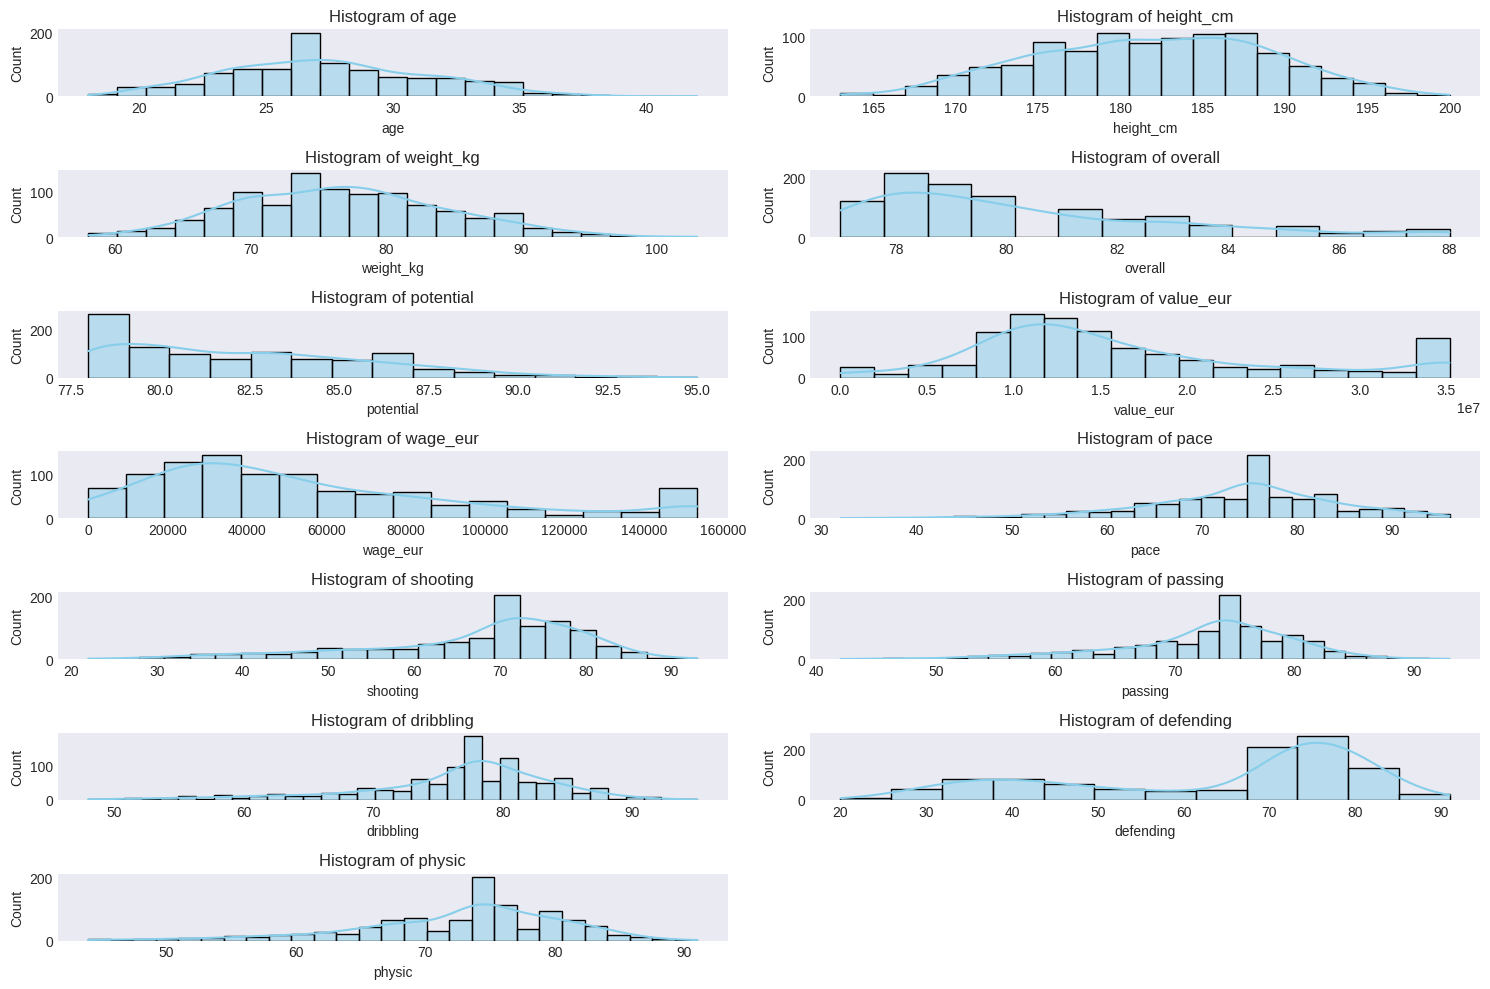

In [112]:
# Plot histograms for each numerical variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 1) // 2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()


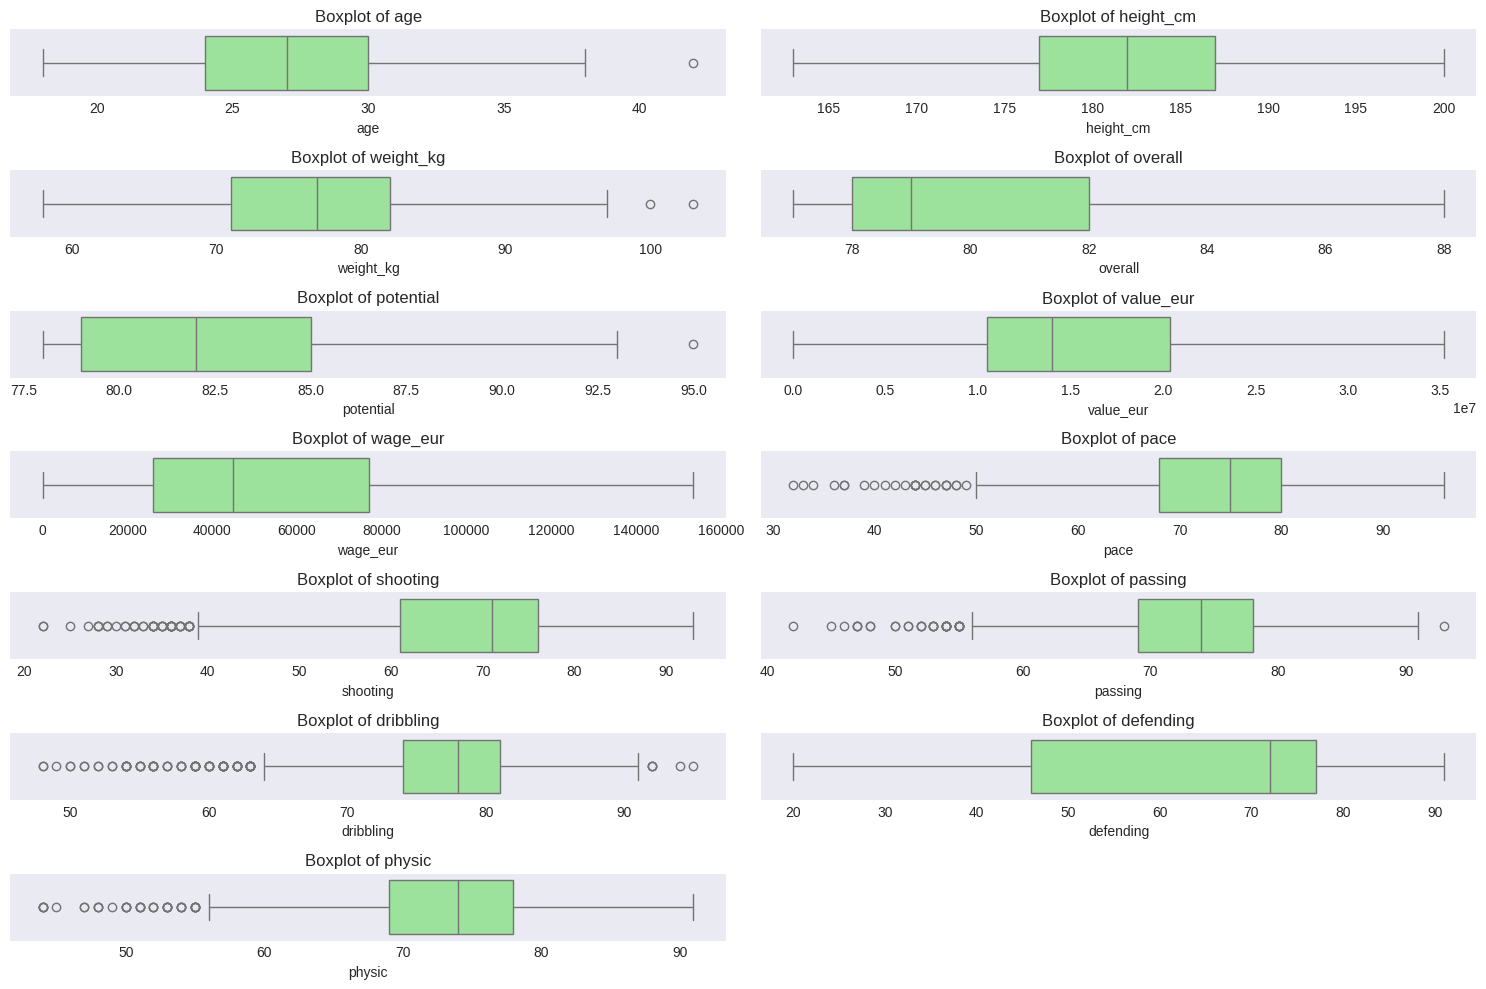

In [113]:
# Box plots for numerical variables to visualize potential remaining outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 1) // 2, 2, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()


# **Frequency distributions for categorical variables**



Top 10 frequency counts for 'short_name':
short_name
rafinha          2
paulinho         2
gabriel          2
fernando         2
emerson          2
l. martínez      2
n. maksimović    2
otávio           2
j. rodríguez     2
m. dembélé       2
Name: count, dtype: int64


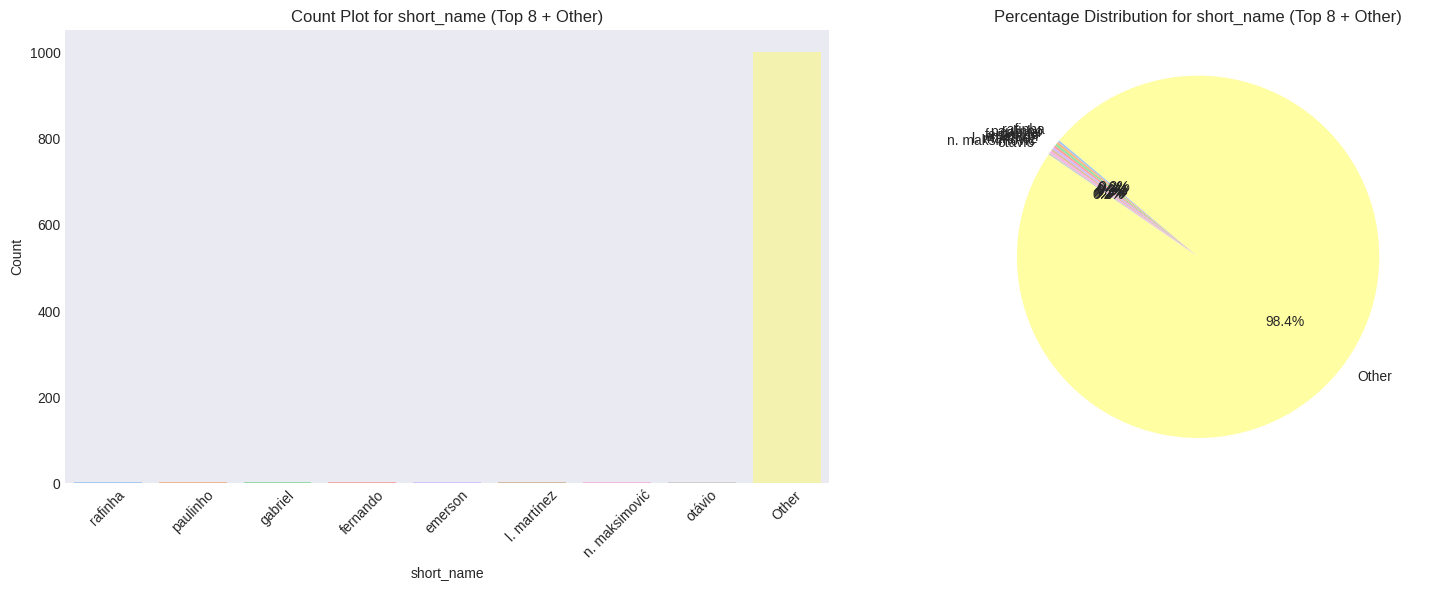


Top 10 frequency counts for 'long_name':
long_name
alexandre moreno lopera                1
lionel andrés messi cuccittini         1
cristiano ronaldo dos santos aveiro    1
jan oblak                              1
robert lewandowski                     1
neymar da silva santos júnior          1
kevin de bruyne                        1
kylian mbappé lottin                   1
marc-andré ter stegen                  1
virgil van dijk                        1
Name: count, dtype: int64


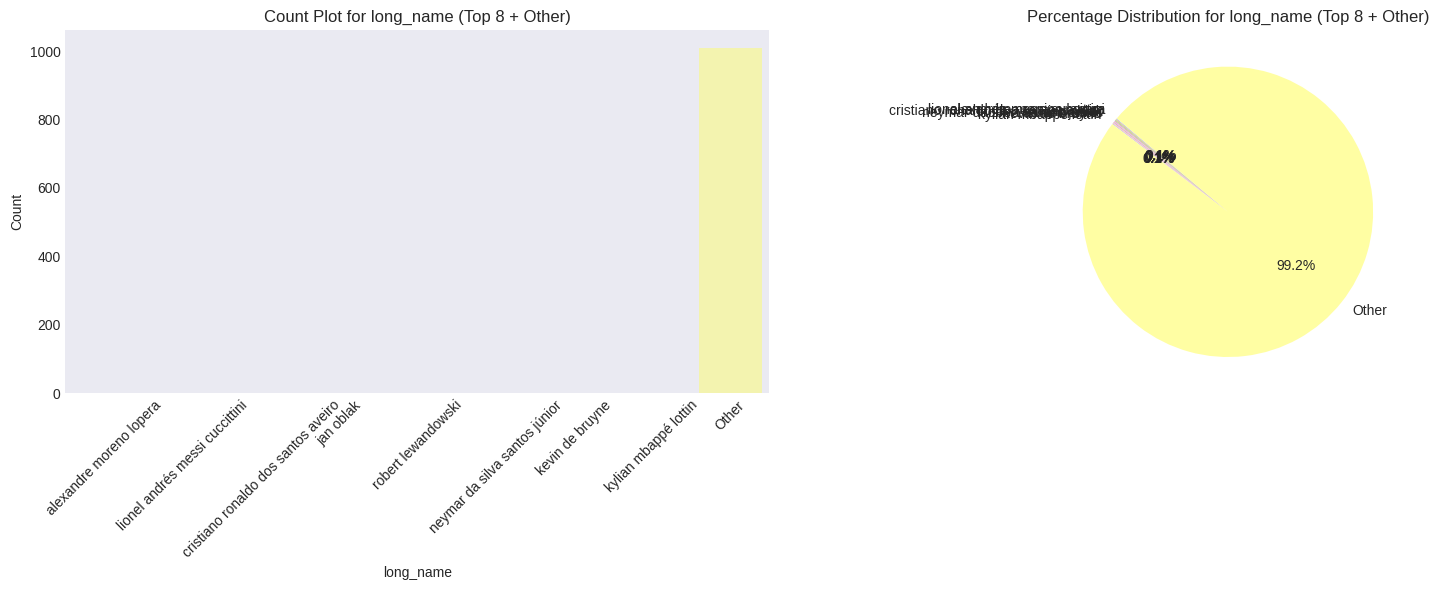


Top 10 frequency counts for 'nationality':
nationality
spain          140
brazil         108
france         101
argentina       62
england         60
germany         57
italy           50
portugal        49
uruguay         35
netherlands     31
Name: count, dtype: int64


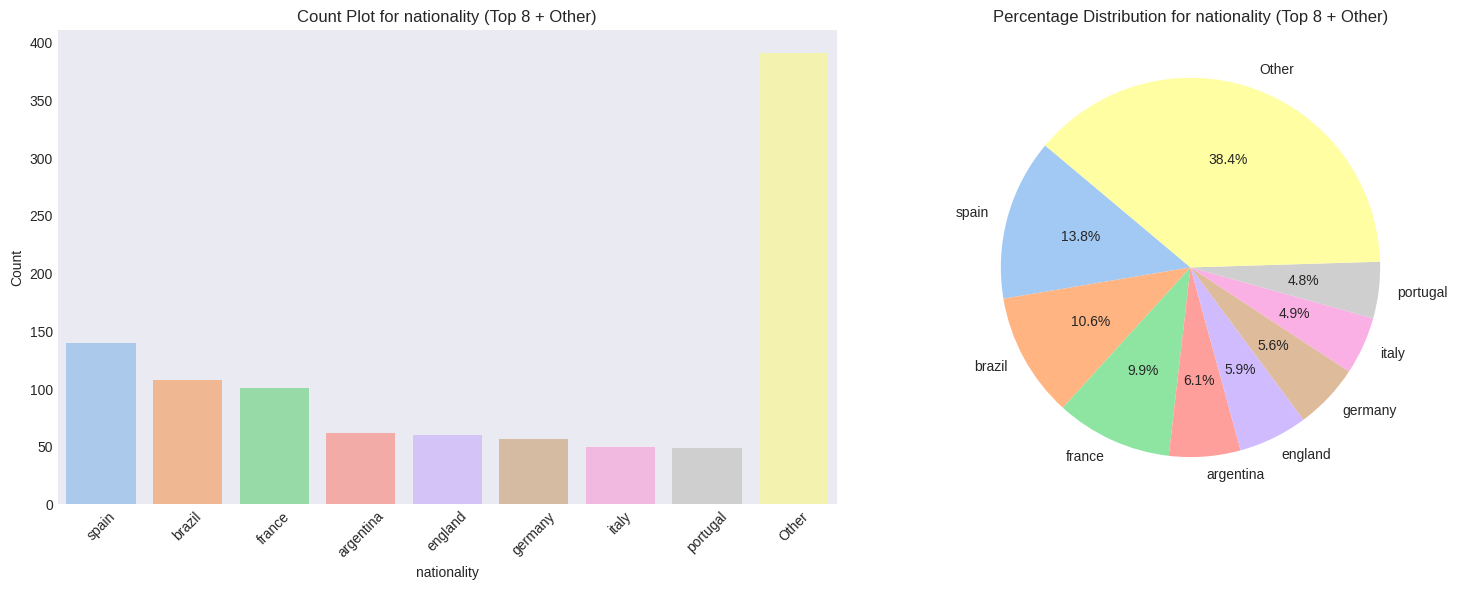


Top 10 frequency counts for 'club_name':
club_name
chelsea              46
tottenham hotspur    22
real madrid          22
liverpool            22
atlético madrid      21
juventus             20
manchester united    20
manchester city      20
inter                20
napoli               19
Name: count, dtype: int64


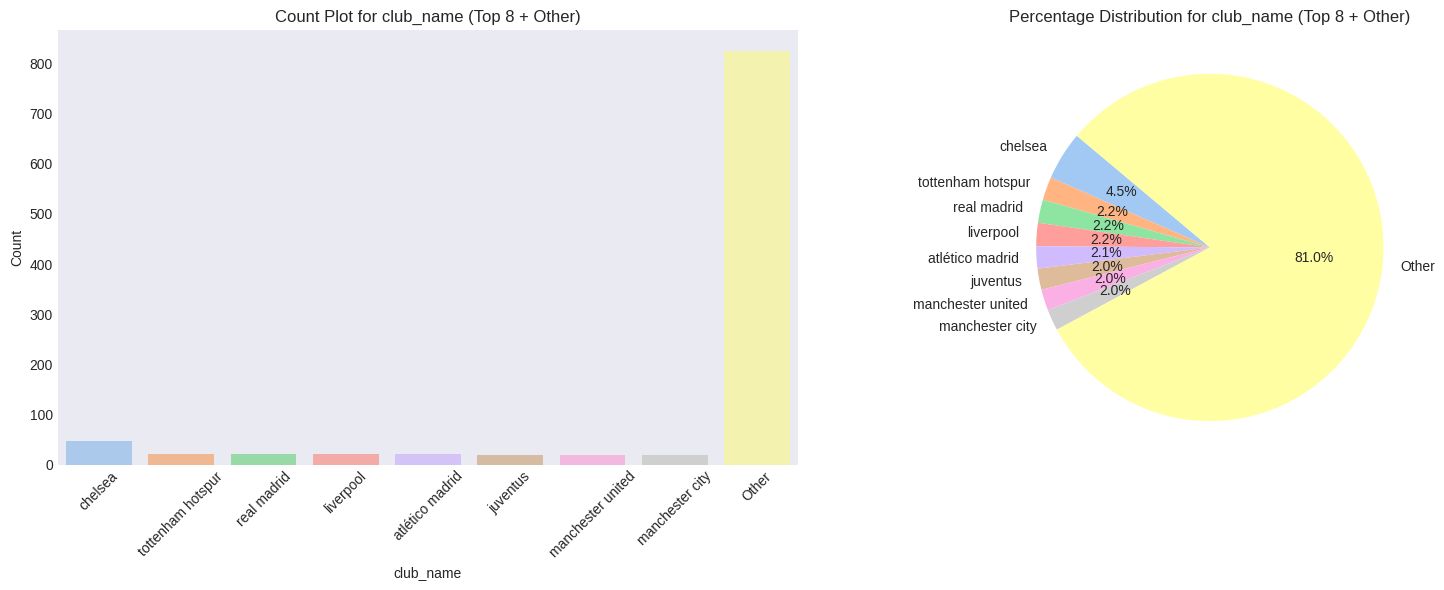


Top 10 frequency counts for 'league_name':
league_name
english premier league           241
spain primera division           189
italian serie a                  140
german 1. bundesliga             122
french ligue 1                    91
portuguese liga zon sagres        45
campeonato brasileiro série a     29
holland eredivisie                26
argentina primera división        20
chinese super league              18
Name: count, dtype: int64


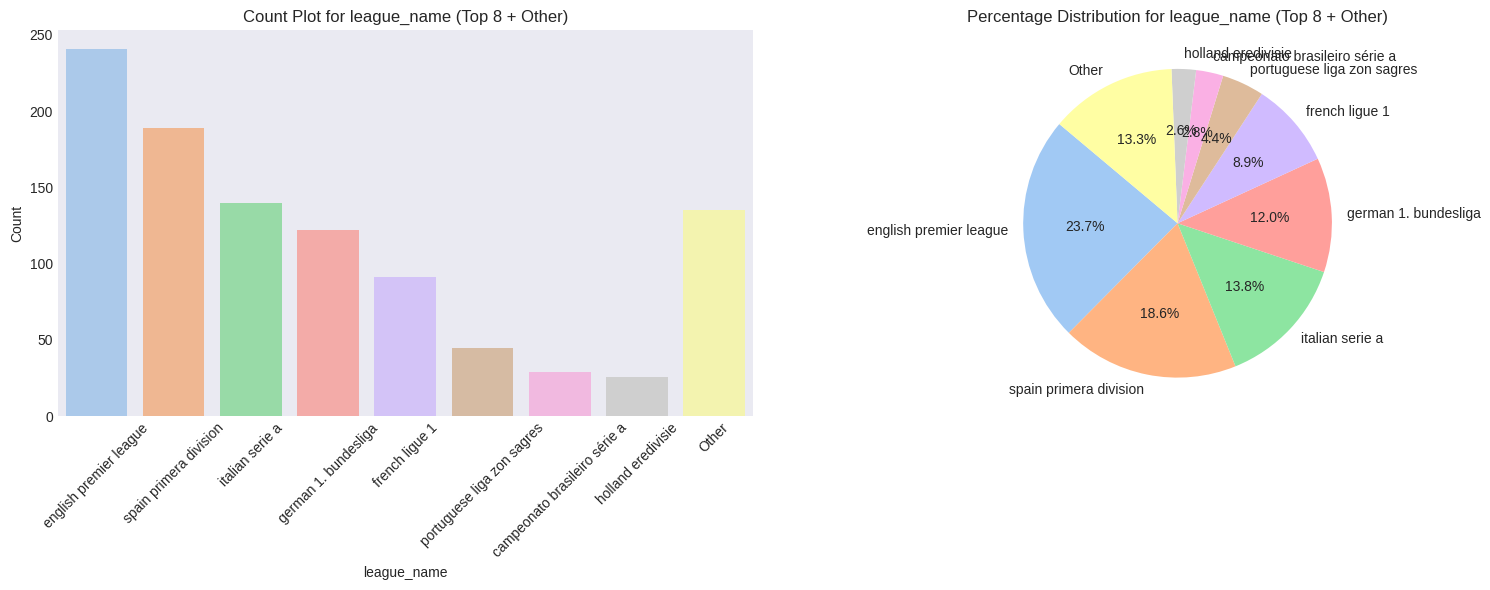


Top 10 frequency counts for 'player_positions':
player_positions
cb         128
gk         116
st          98
cdm, cm     67
lb          38
cm, cdm     36
rb          32
cm          30
lm          18
lb, lm      14
Name: count, dtype: int64


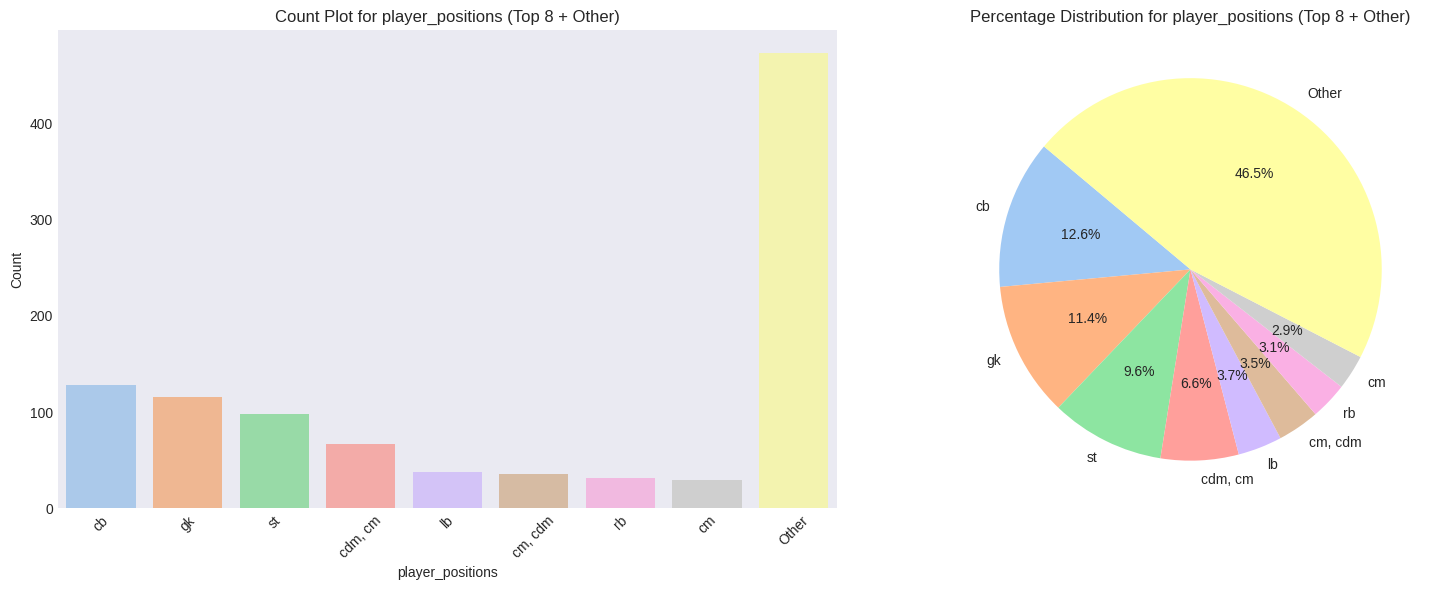


Top 10 frequency counts for 'preferred_foot':
preferred_foot
right    766
left     252
Name: count, dtype: int64


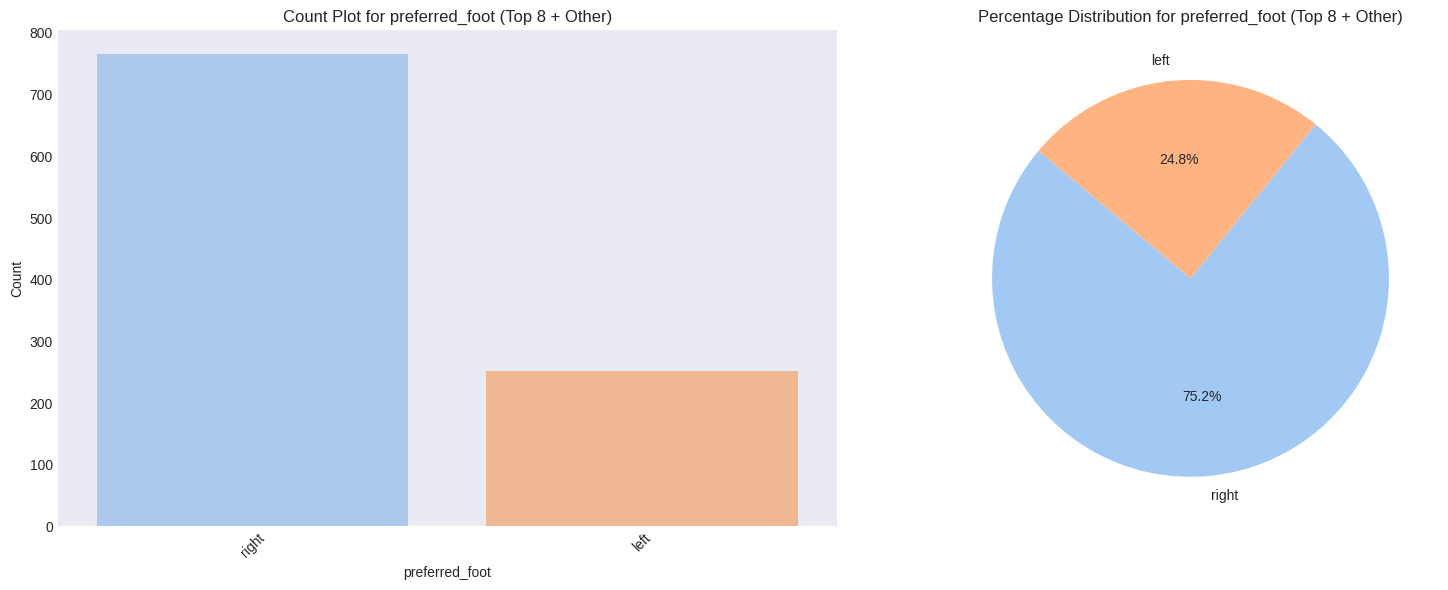


Top 10 frequency counts for 'body_type':
body_type
normal                  531
lean                    301
stocky                   73
player_body_type_326      1
player_body_type_251      1
player_body_type_367      1
player_body_type_331      1
player_body_type_350      1
player_body_type_309      1
player_body_type_261      1
Name: count, dtype: int64


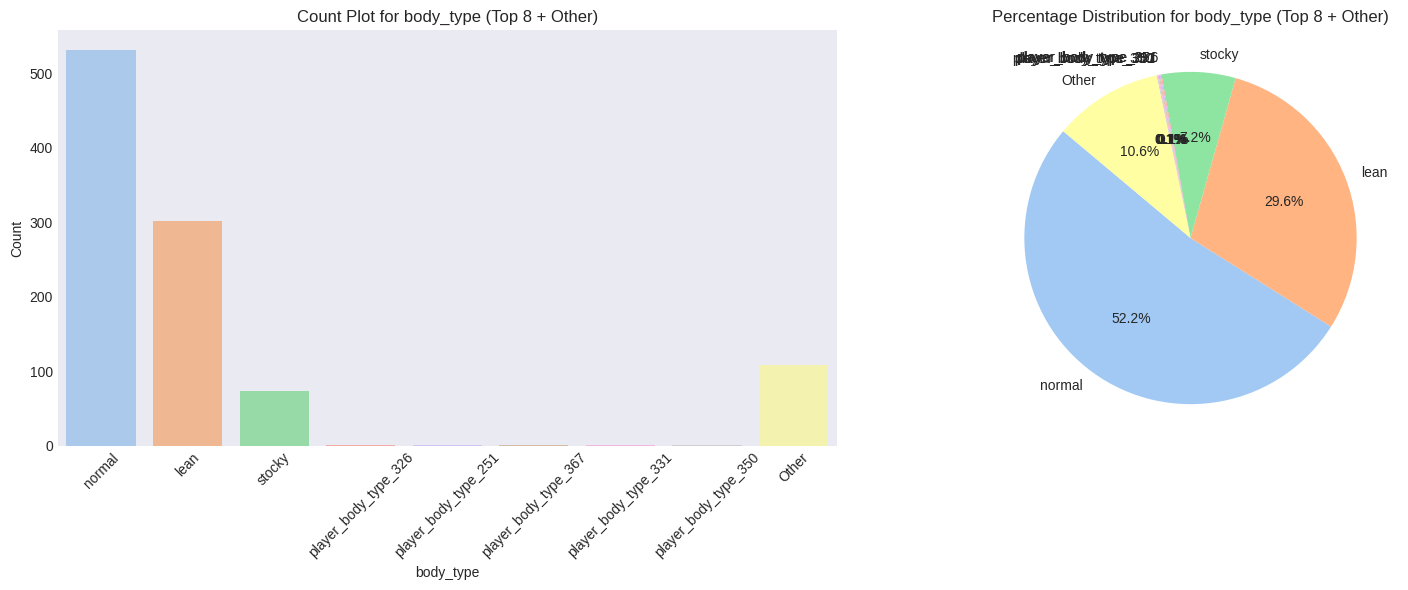

In [114]:
# Plot frequency distributions for each selected categorical column
for col in cat_cols:
    if col in df.columns:
        # Get the value counts
        value_counts = df[col].value_counts()
        
        # Show the top 10 most frequent categories in the printout
        print(f"\nTop 10 frequency counts for '{col}':")
        print(value_counts.head(10))
        
        # For plotting, keep only top 8 categories and group others as "Other"
        if len(value_counts) > 8:
            top_8 = value_counts.head(8)
            other_count = value_counts[8:].sum()
            
            # Create a new series with top 8 + "Other"
            plot_data = pd.Series({
                **dict(top_8),
                "Other": other_count
            })
        else:
            plot_data = value_counts
            
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Bar plot (count plot) - manually create it since we're using our own data
        sns.barplot(x=plot_data.index, y=plot_data.values, ax=axes[0], palette="pastel")
        axes[0].set_title(f"Count Plot for {col} (Top 8 + Other)")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Count")
        axes[0].tick_params(axis='x', rotation=45)
        
        # Pie chart for percentage distribution
        axes[1].pie(plot_data, labels=plot_data.index, autopct="%1.1f%%", startangle=140,
                    colors=sns.color_palette('pastel'))
        axes[1].set_title(f"Percentage Distribution for {col} (Top 8 + Other)")
        
        plt.tight_layout()
        plt.show()


### 2.2 Bivariate Analysis – Two Variable Exploration 
In this section, we compare two variables at a time. For numerical–numerical comparisons we build a correlation matrix and scatter plots; for numerical–categorical comparisons we use box and violin plots.


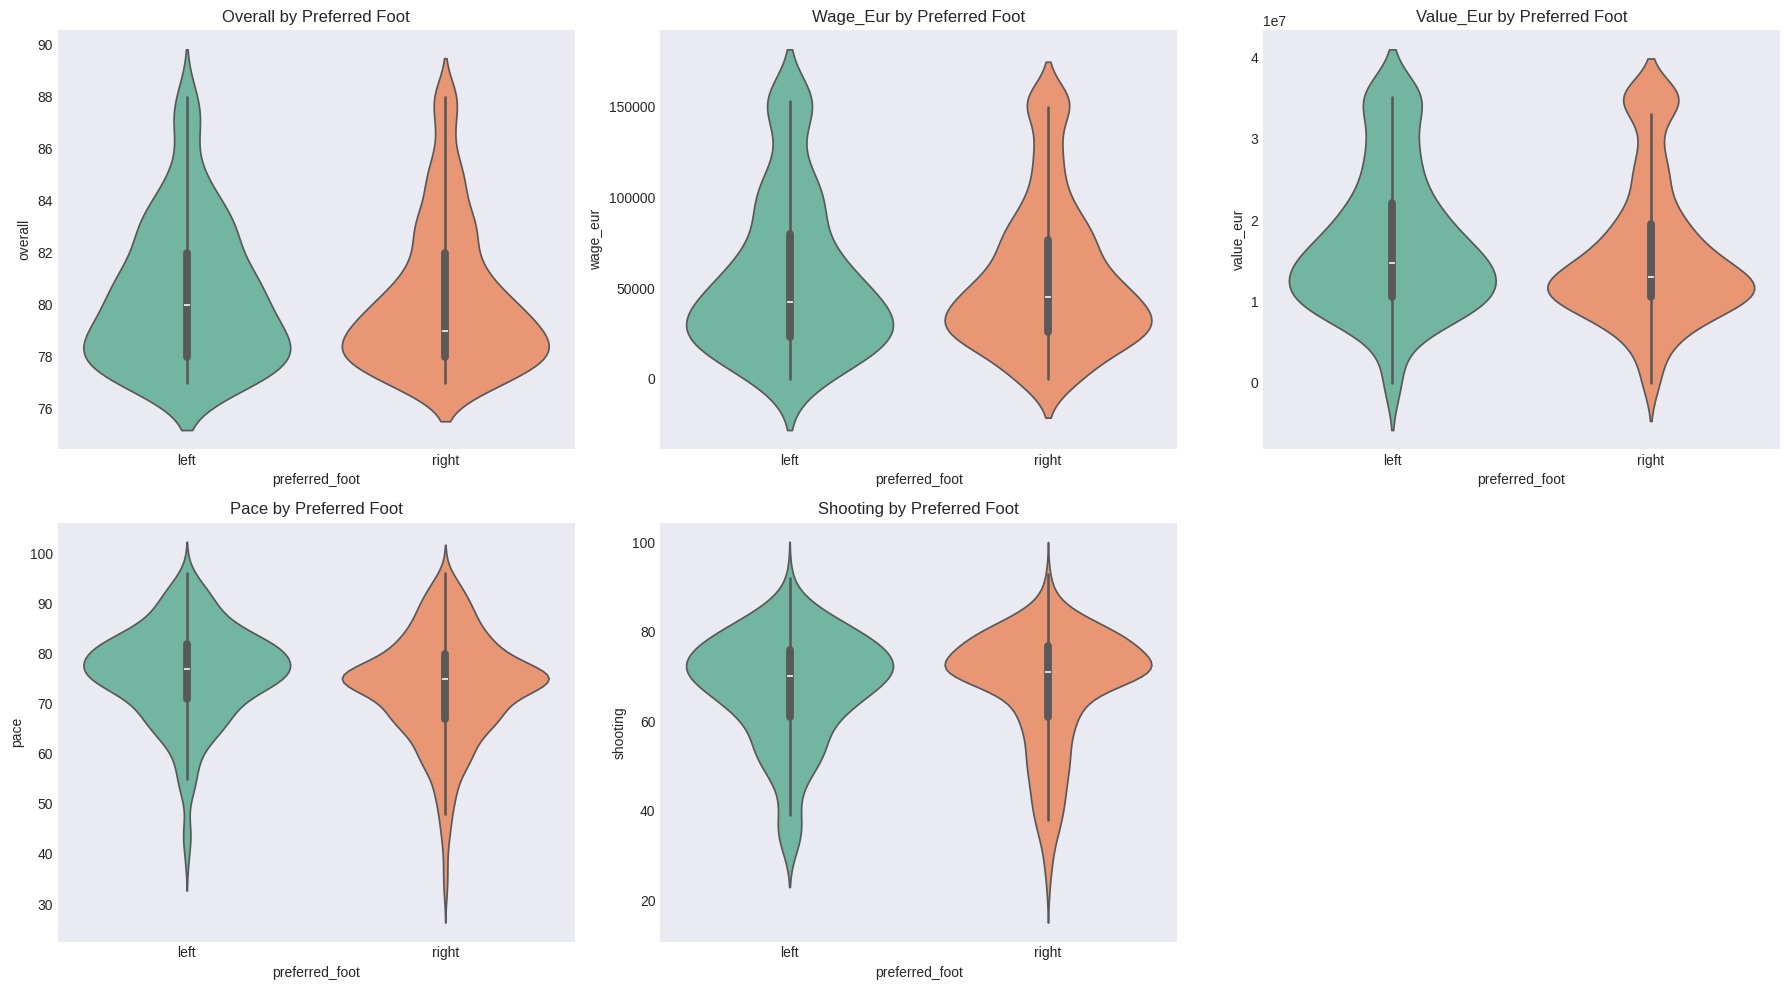

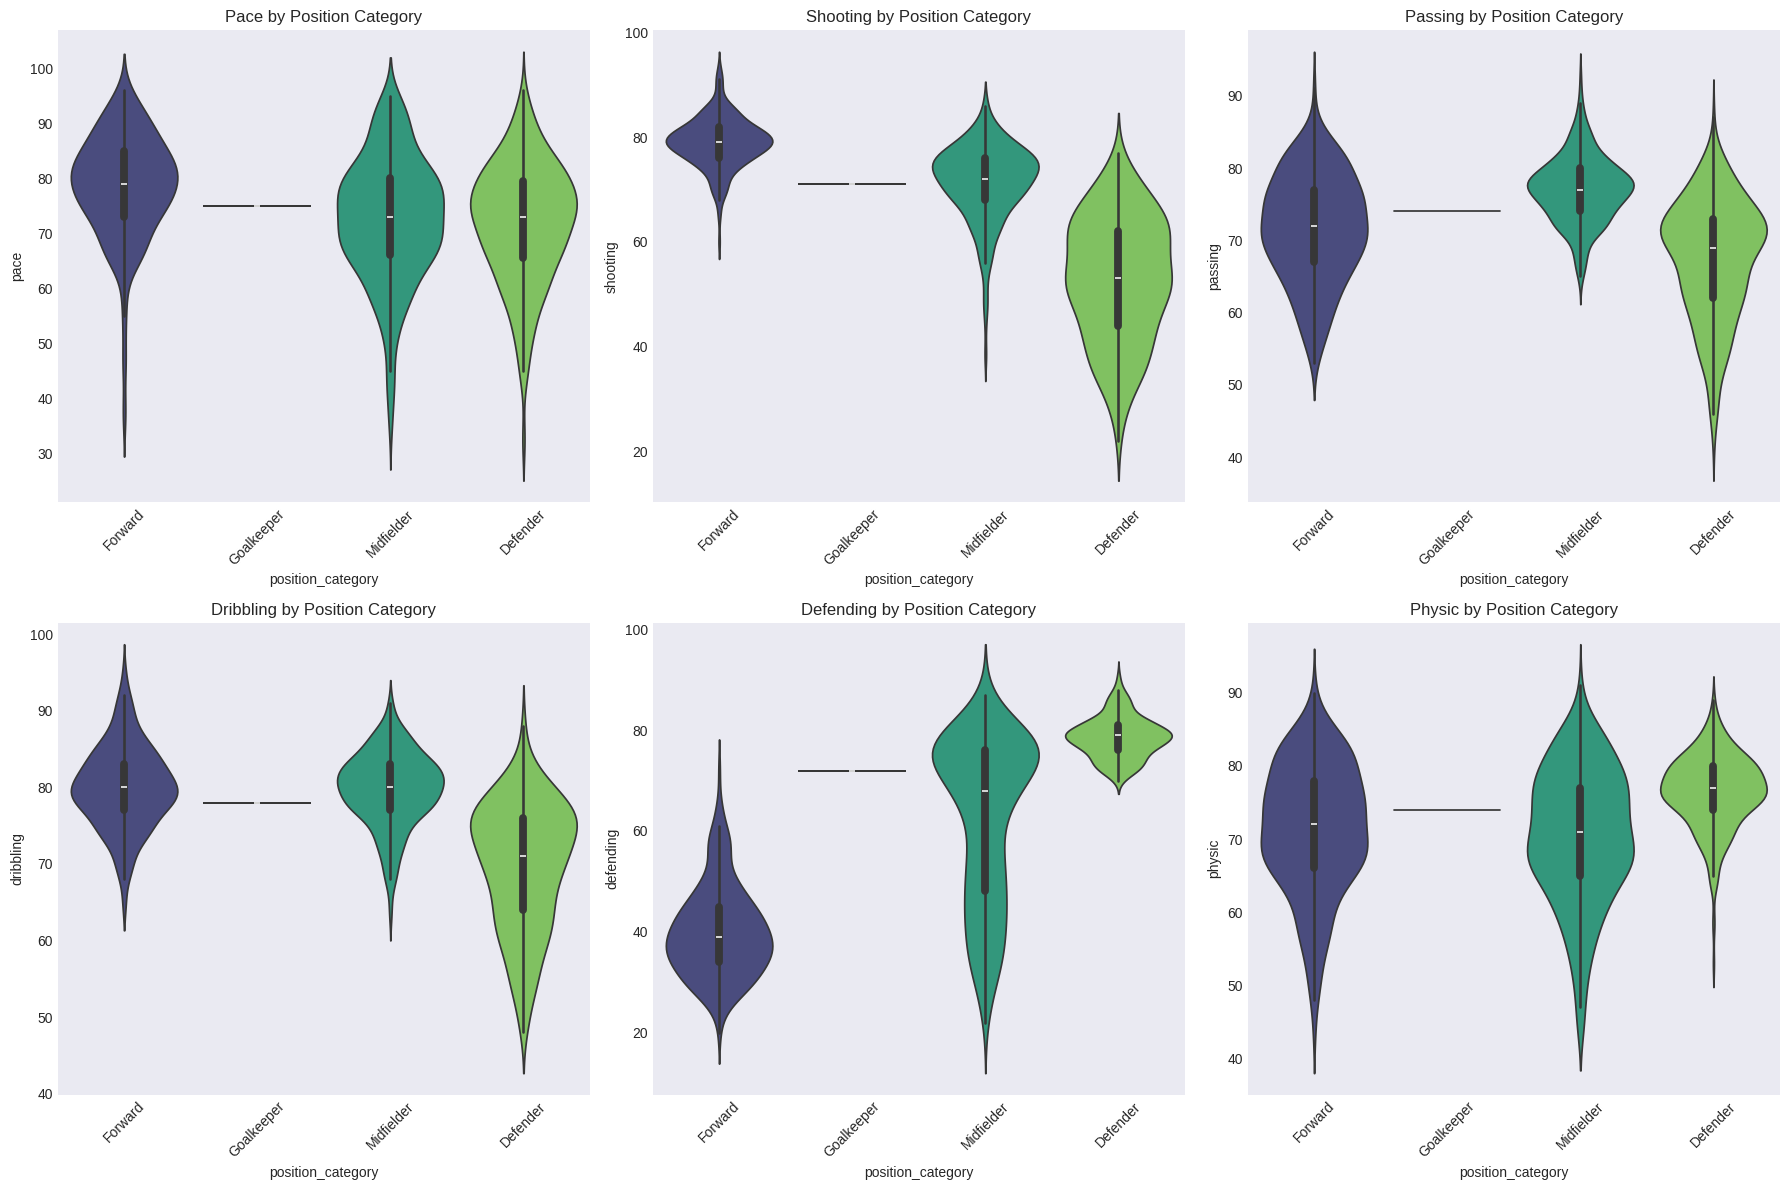

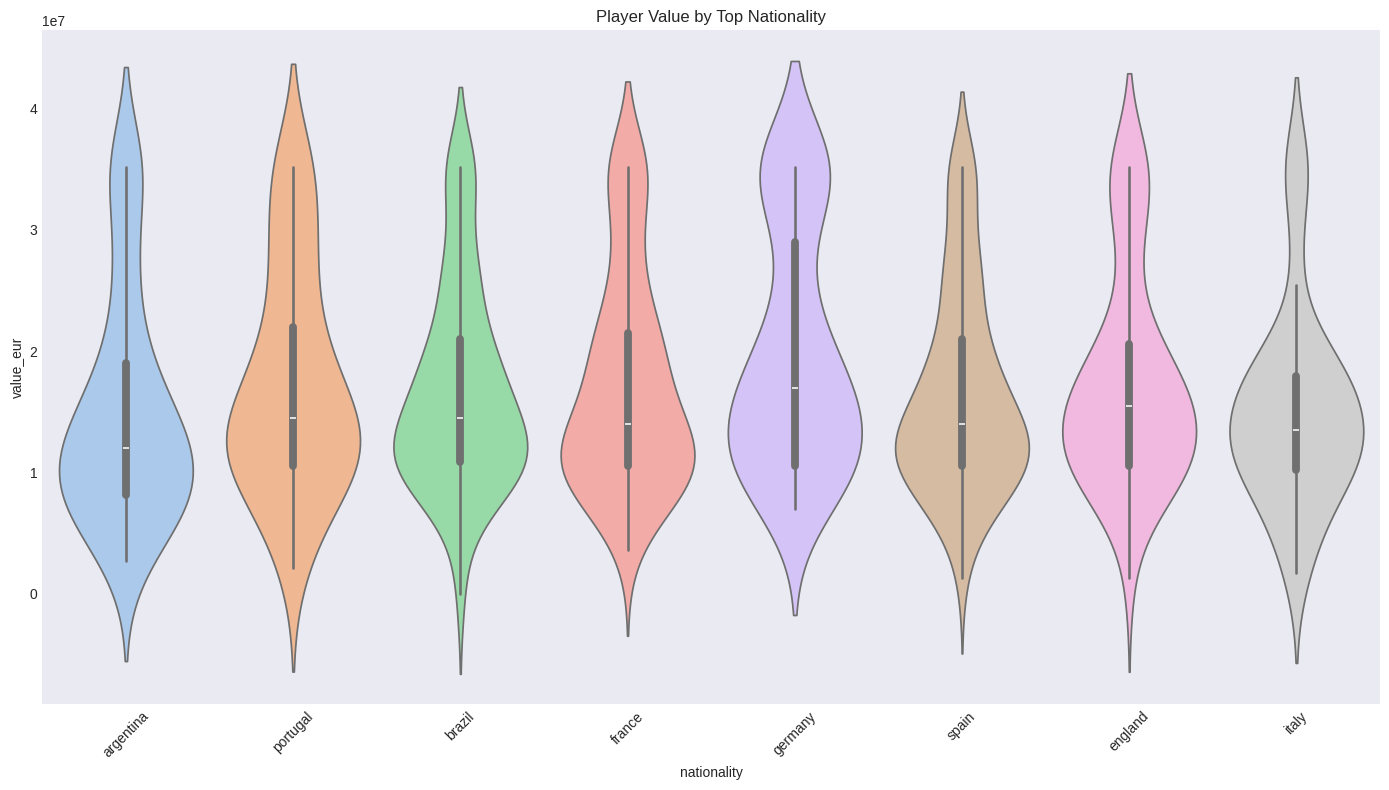

In [115]:
# Create violin plots to compare categorical and numerical variables

plt.figure(figsize=(18, 10))
numerical_vars = ['overall', 'wage_eur', 'value_eur', 'pace', 'shooting']
for i, num_var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='preferred_foot', y=num_var, data=df, palette="Set2")
    plt.title(f'{num_var.title()} by Preferred Foot')
    plt.tight_layout()
plt.show()

# Let's create violin plots for position type vs player attributes
if 'primary_position' not in df.columns and 'player_positions' in df.columns:
    df['primary_position'] = df['player_positions'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)

position_categories = {
    'gk': 'Goalkeeper',
    'cb': 'Defender', 'lb': 'Defender', 'rb': 'Defender', 
    'lwb': 'Defender', 'rwb': 'Defender',
    'cdm': 'Midfielder', 'cm': 'Midfielder', 'cam': 'Midfielder', 
    'lm': 'Midfielder', 'rm': 'Midfielder',
    'lw': 'Forward', 'rw': 'Forward', 'st': 'Forward', 'cf': 'Forward'
}

df['position_category'] = df['primary_position'].map(lambda x: position_categories.get(x, 'Other'))

plt.figure(figsize=(18, 12))
skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
for i, skill in enumerate(skills, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='position_category', y=skill, data=df, palette="viridis")
    plt.title(f'{skill.title()} by Position Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

# Compare nationality groups by player value
# Just taking top 8 nationalities for better visualization
top_nations = df['nationality'].value_counts().head(8).index
plt.figure(figsize=(14, 8))
sns.violinplot(x='nationality', y='value_eur', data=df[df['nationality'].isin(top_nations)], palette="pastel")
plt.title('Player Value by Top Nationality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlation Matrix among numerical variables:


age  height_cm  weight_kg   overall  potential  value_eur  \
age        1.000000   0.059446   0.132987  0.183119  -0.449519  -0.297116   
height_cm  0.059446   1.000000   0.802659  0.024631   0.053807  -0.043001   
weight_kg  0.132987   0.802659   1.000000  0.038103   0.001707  -0.067570   
overall    0.183119   0.024631   0.038103  1.000000   0.647412   0.814101   
potential -0.449519   0.053807   0.001707  0.647412   1.000000   0.799818   
value_eur -0.297116  -0.043001  -0.067570  0.814101   0.799818   1.000000   
wage_eur   0.009925   0.001872  -0.004510  0.695465   0.528538   0.699708   
pace      -0.278878  -0.387043  -0.322152  0.121045   0.253836   0.248768   
shooting   0.105799  -0.189048  -0.152278  0.241606   0.101994   0.231867   
passing    0.082273  -0.341827  -0.330653  0.362802   0.196244   0.326438   
dribbling -0.062053  -0.466128  -0.426900  0.307135   0.267365   0.360586   
defending  0.081057   0.284223   0.243374  0.053760  -0.006973  -0.063066   
physic     0.070253   0.543013   0.565637  0.085881   0.032932   0.019877   

           wage_eur      pace  shooting   passing  dribbling  defending  \
age        0.009925 -0.278878  0.105799  0.082273  -0.062053   0.081057   
height_cm  0.001872 -0.387043 -0.189048 -0.341827  -0.466128   0.284223   
weight_kg -0.004510 -0.322152 -0.152278 -0.330653  -0.426900   0.243374   
overall    0.695465  0.121045  0.241606  0.362802   0.307135   0.053760   
potential  0.528538  0.253836  0.101994  0.196244   0.267365  -0.006973   
value_eur  0.699708  0.248768  0.231867  0.326438   0.360586  -0.063066   
wage_eur   1.000000  0.058253  0.146182  0.269730   0.238305   0.033151   
pace       0.058253  1.000000  0.305771  0.178191   0.534577  -0.416160   
shooting   0.146182  0.305771  1.000000  0.582800   0.728892  -0.632066   
passing    0.269730  0.178191  0.582800  1.000000   0.756626  -0.128770   
dribbling  0.238305  0.534577  0.728892  0.756626   1.000000  -0.500608   
defending  0.033151 -0.416160 -0.632066 -0.128770  -0.500608   1.000000   
physic     0.053469 -0.293984 -0.278682 -0.346851  -0.510279   0.504837   

             physic  
age        0.070253  
height_cm  0.543013  
weight_kg  0.565637  
overall    0.085881  
potential  0.032932  
value_eur  0.019877  
wage_eur   0.053469  
pace      -0.293984  
shooting  -0.278682  
passing   -0.346851  
dribbling -0.510279  
defending  0.504837  
physic     1.000000

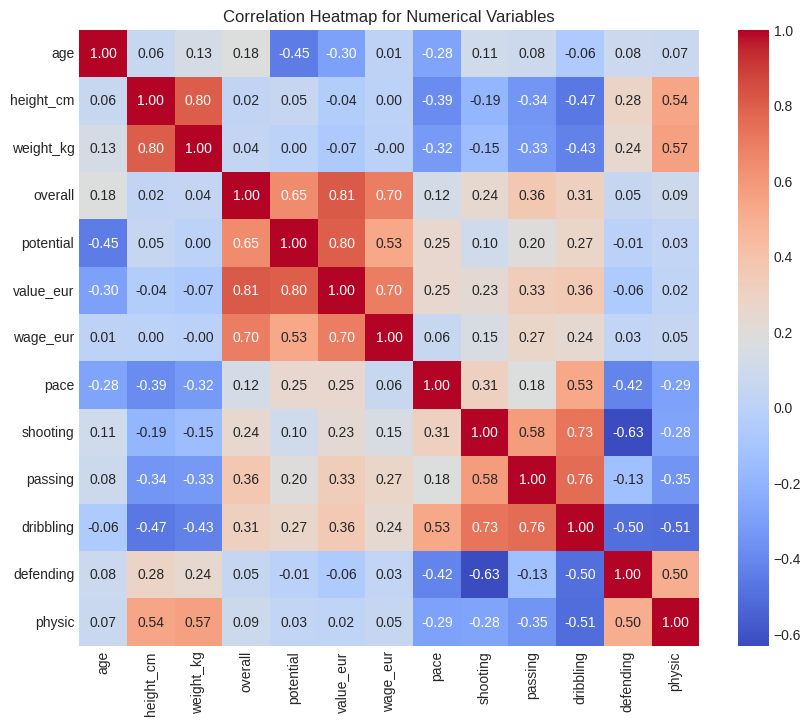

In [116]:
# Compute correlation matrix for numerical features and visualize using a heatmap
corr_matrix = df[num_cols].corr()
print("Correlation Matrix among numerical variables:")
display(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()


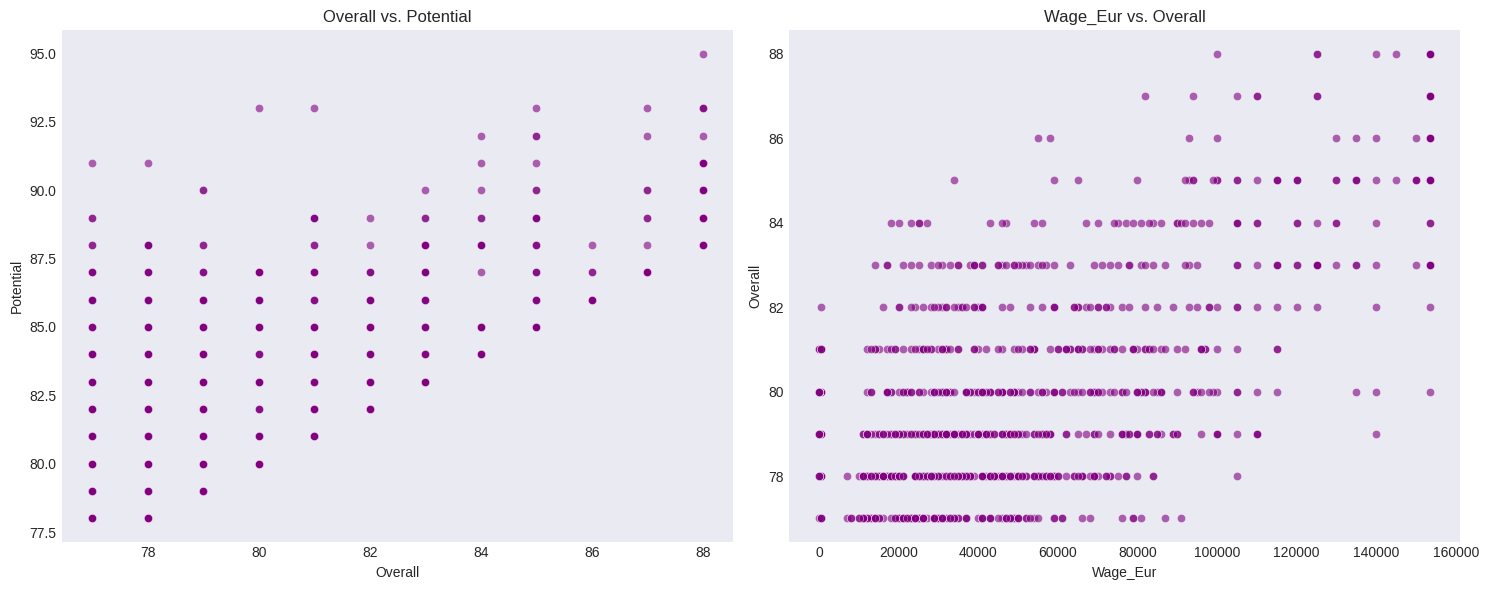

In [117]:
# Scatter plots for selected numerical variable pairs.
# For example, we compare 'overall' vs. 'potential', and 'wage_eur' vs. 'overall'
num_pairs = [('overall', 'potential'), ('wage_eur', 'overall')]
plt.figure(figsize=(15, 6))
for i, (x, y) in enumerate(num_pairs, 1):
    plt.subplot(1, len(num_pairs), i)
    sns.scatterplot(x=df[x], y=df[y], color='purple', alpha=0.6)
    plt.title(f"{x.title()} vs. {y.title()}")
    plt.xlabel(x.title())
    plt.ylabel(y.title())
plt.tight_layout()
plt.show()


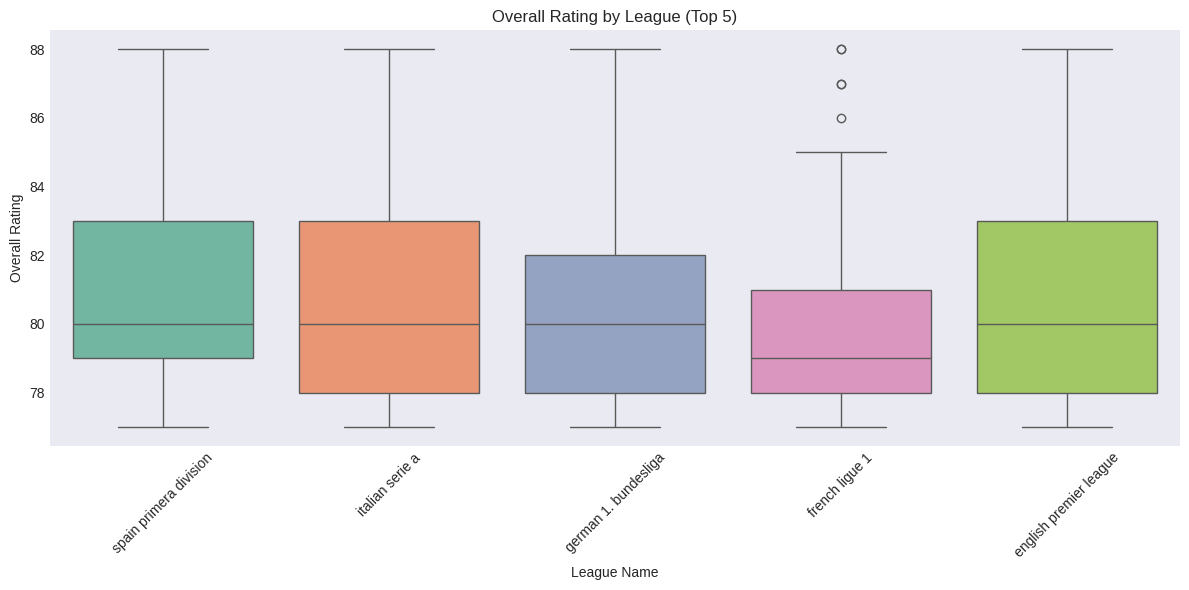

In [118]:
# Compare a numerical variable against a categorical variable.
# For instance, observe the distribution of 'overall' across different 'league_name' categories.
if 'league_name' in df.columns and 'overall' in df.columns:
    plt.figure(figsize=(12, 6))
    top_leagues = df['league_name'].value_counts().nlargest(5).index
    sns.boxplot(x='league_name', y='overall', data=df[df['league_name'].isin(top_leagues)], palette="Set2")
    plt.title("Overall Rating by League (Top 5)")
    plt.xlabel("League Name")
    plt.ylabel("Overall Rating")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 2.3 Multivariate Analysis – Multiple Variables Exploration
To understand complex interactions among the variables, we use pair plots and grouped visualizations.


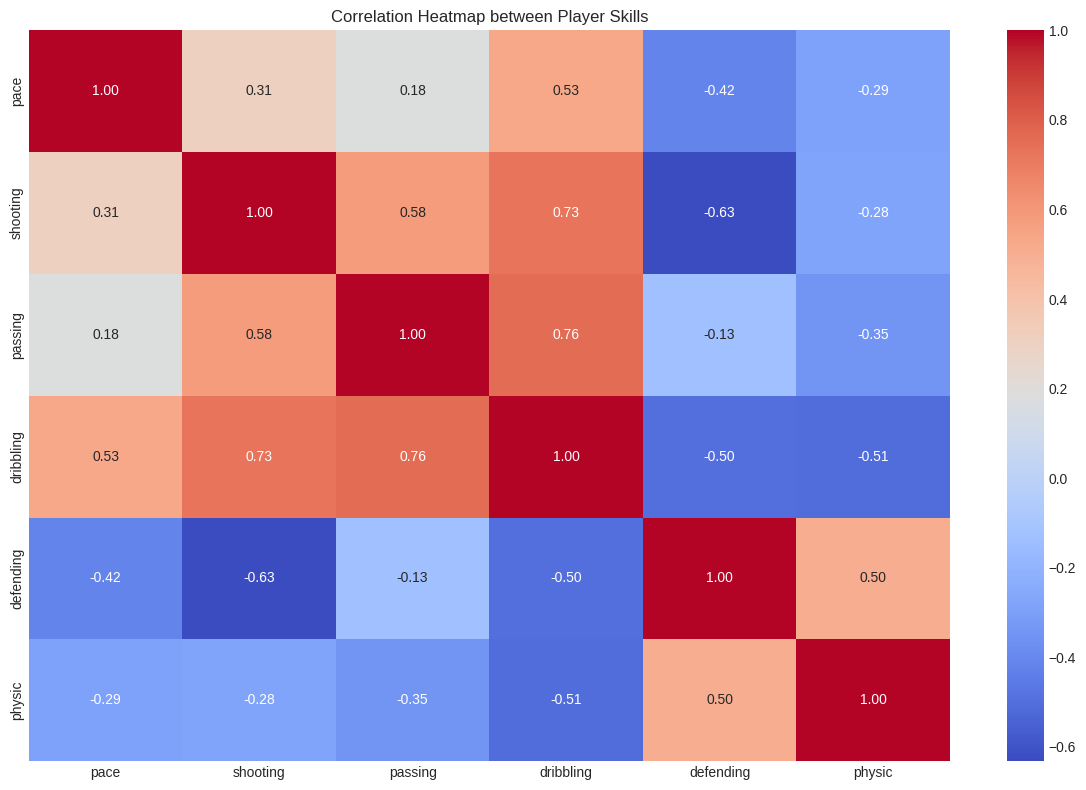

<Figure size 1400x800 with 0 Axes>

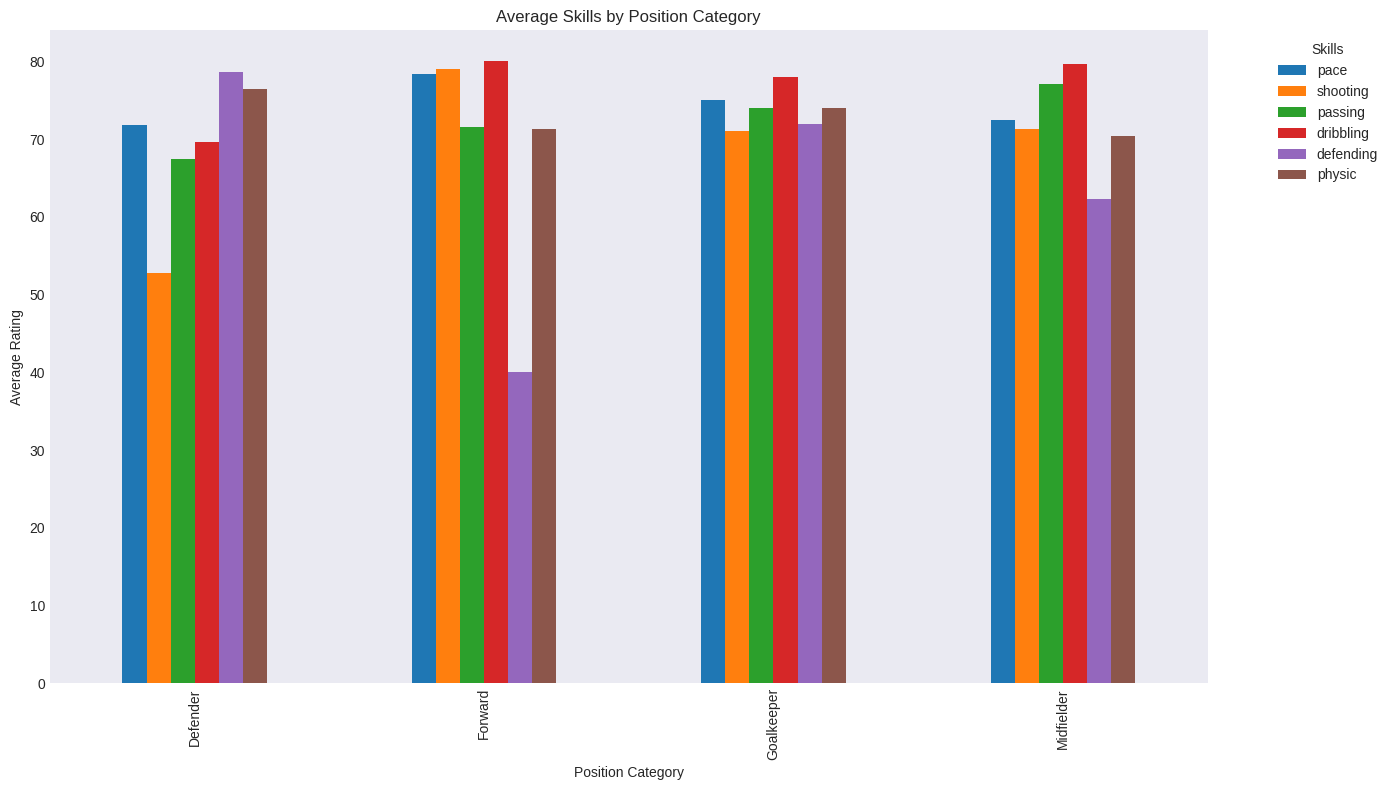

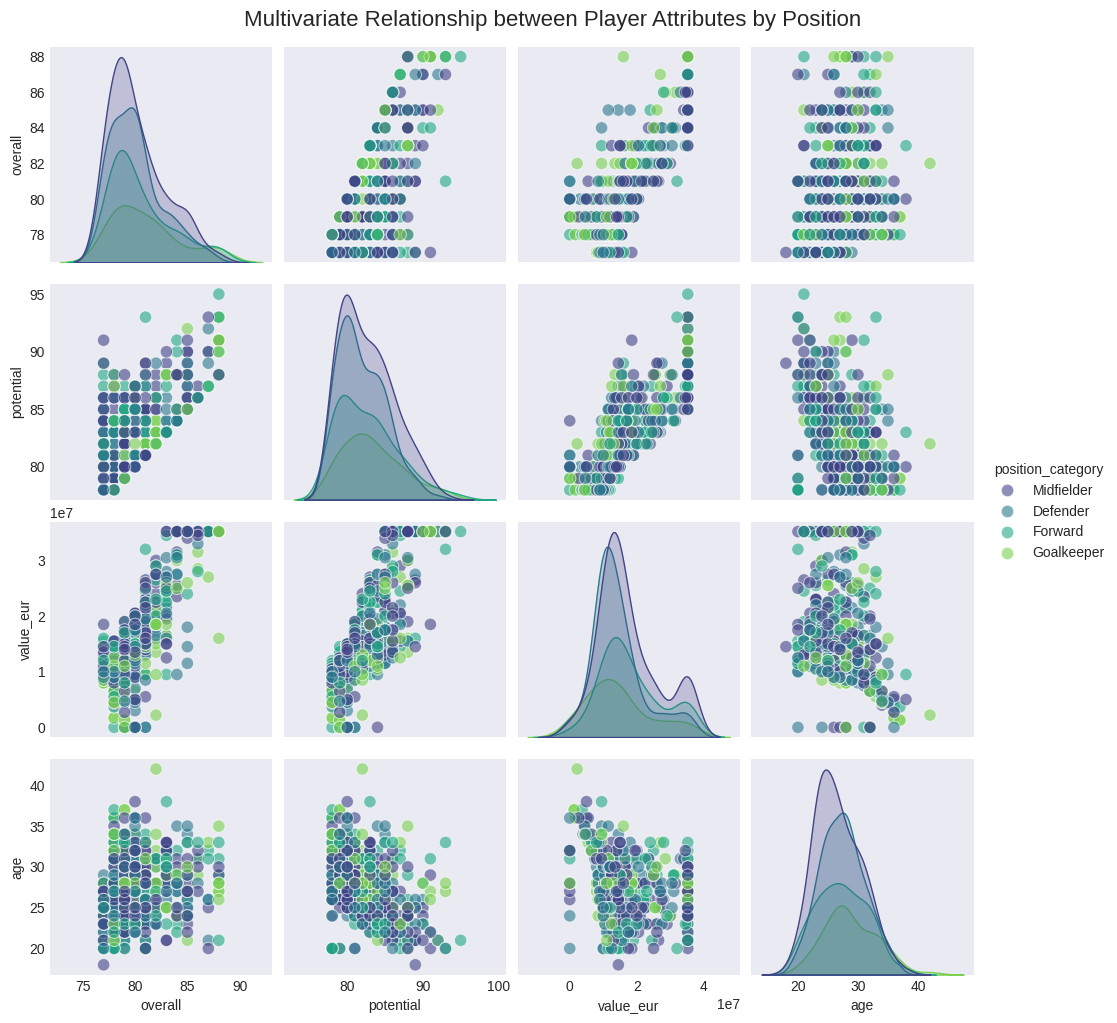

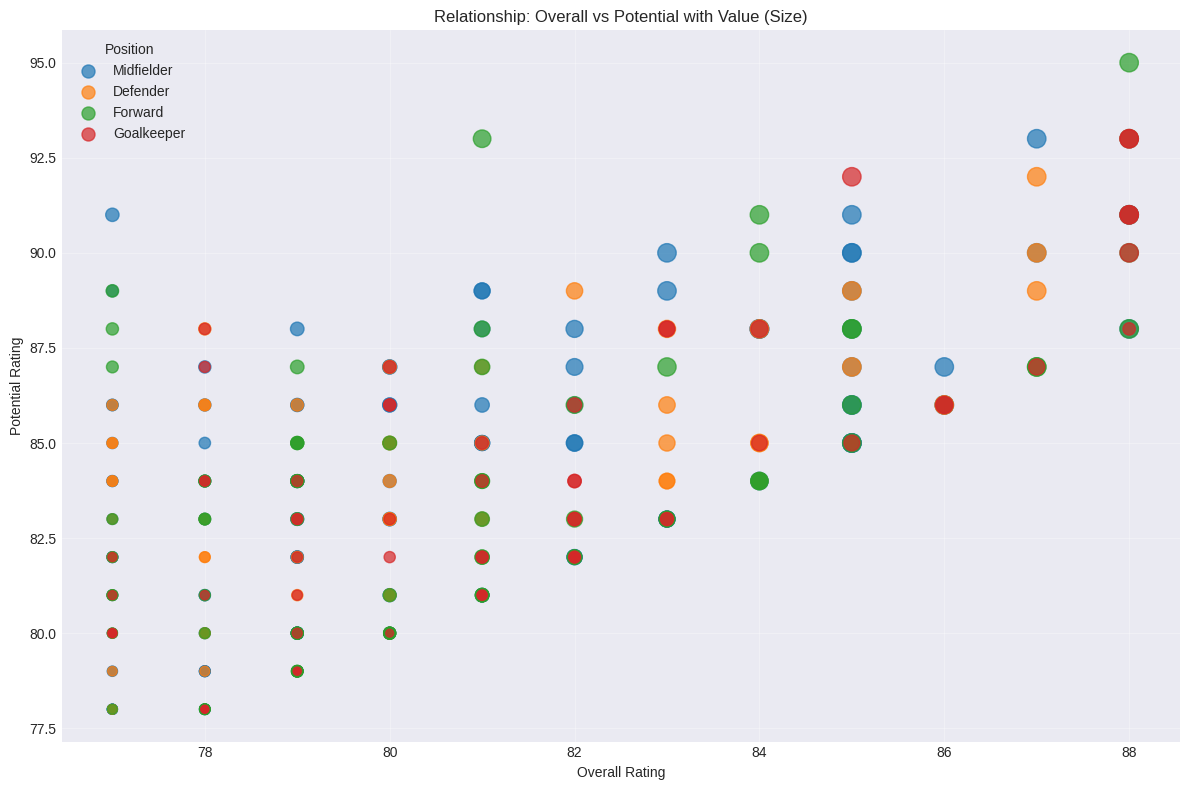

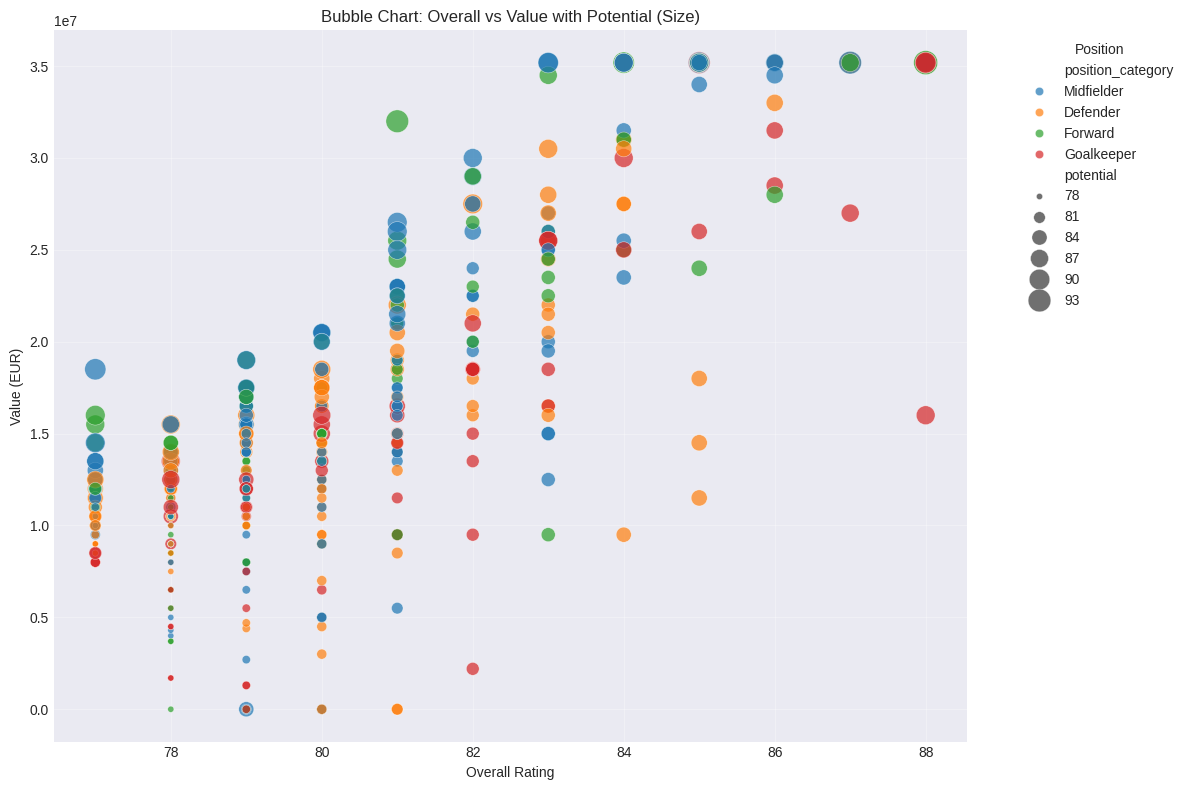

In [119]:
# Create a comprehensive multivariate analysis

# 1. Heatmap showing correlations between player skills
plt.figure(figsize=(12, 8))
skill_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
skill_corr = df[skill_cols].corr()
sns.heatmap(skill_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Player Skills')
plt.tight_layout()
plt.show()

# 2. Grouped bar chart: Compare average player attributes across position categories
plt.figure(figsize=(14, 8))
position_skills = df.groupby('position_category')[skill_cols].mean()
position_skills.plot(kind='bar', figsize=(14, 8))
plt.title('Average Skills by Position Category')
plt.xlabel('Position Category')
plt.ylabel('Average Rating')
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Scatter plot matrix for selected player attributes with position category coloring
# Sample to avoid overcrowding
sample_size = min(500, len(df))
plot_df = df.sample(n=sample_size, random_state=42)

# Create scatter plot matrix with position category coloring
selected_cols = ['overall', 'potential', 'value_eur', 'age']
scatter_kws = {'alpha': 0.6, 's': 80}
g = sns.pairplot(plot_df, vars=selected_cols, hue='position_category', 
				 palette='viridis', height=2.5, plot_kws=scatter_kws)
g.fig.suptitle('Multivariate Relationship between Player Attributes by Position', y=1.02, fontsize=16)
plt.show()

plt.figure(figsize=(12, 8))

# Make sure plot_df has the position_category column
if 'position_category' not in plot_df.columns and 'primary_position' in plot_df.columns:
	# Create the position category if it's missing in our sample
	plot_df['position_category'] = plot_df['primary_position'].map(
		lambda x: position_categories.get(x, 'Other') if pd.notna(x) else 'Other'
	)

# Create a scatter plot with size representing value_eur
for category in plot_df['position_category'].unique():
	group = plot_df[plot_df['position_category'] == category]
	plt.scatter(
		group['overall'], 
		group['potential'],
		s=group['value_eur']/200000,  # Adjust size for better visualization
		alpha=0.7,
		label=category
	)

plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')
plt.title('Relationship: Overall vs Potential with Value (Size)')
plt.legend(title='Position')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Alternative visualization: Bubble chart for the three variables
plt.figure(figsize=(12, 8))
sns.scatterplot(
	data=plot_df, 
	x='overall', 
	y='value_eur',
	hue='position_category',
	size='potential',  # Use potential as the size of bubbles
	sizes=(20, 300),   # Range of point sizes
	alpha=0.7
)
plt.title('Bubble Chart: Overall vs Value with Potential (Size)')
plt.xlabel('Overall Rating')
plt.ylabel('Value (EUR)')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


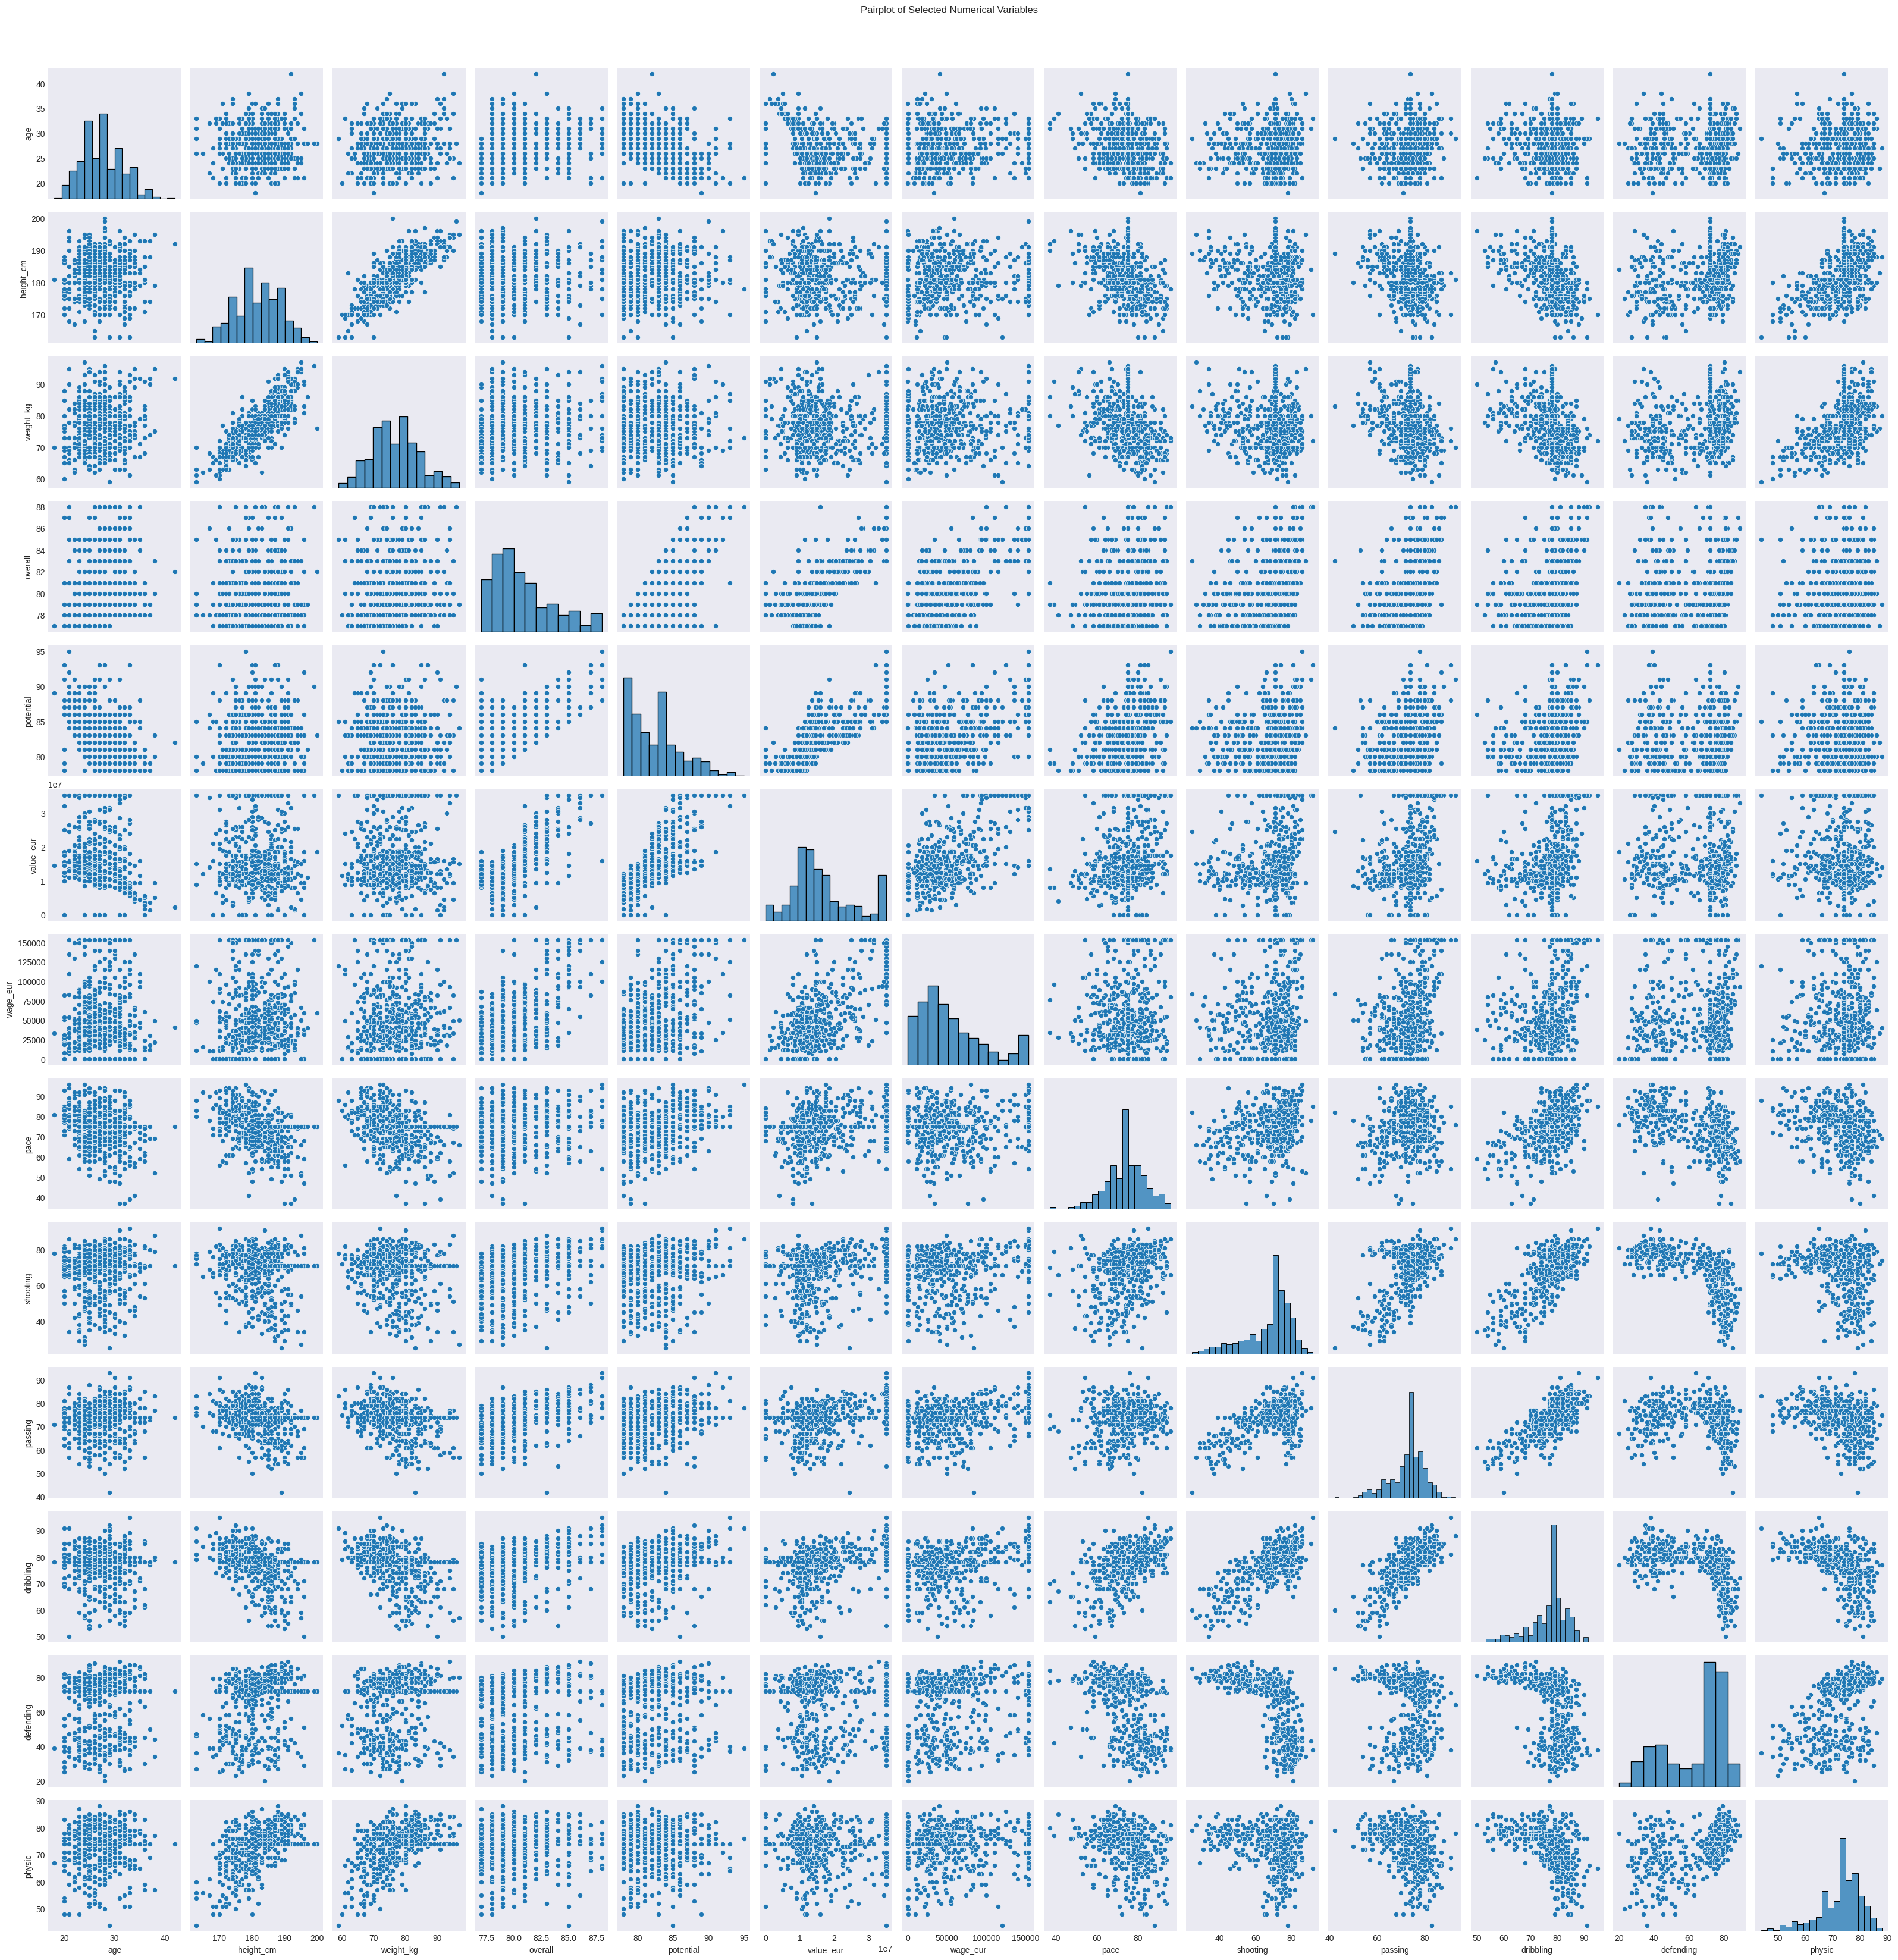

In [120]:
# Create a pairplot for the numerical variables.
# If the dataset is large, consider sampling a subset
sample_df = df[num_cols].sample(n=min(500, len(df)), random_state=42)
sns.pairplot(sample_df)
plt.suptitle("Pairplot of Selected Numerical Variables", y=1.02)
plt.show()


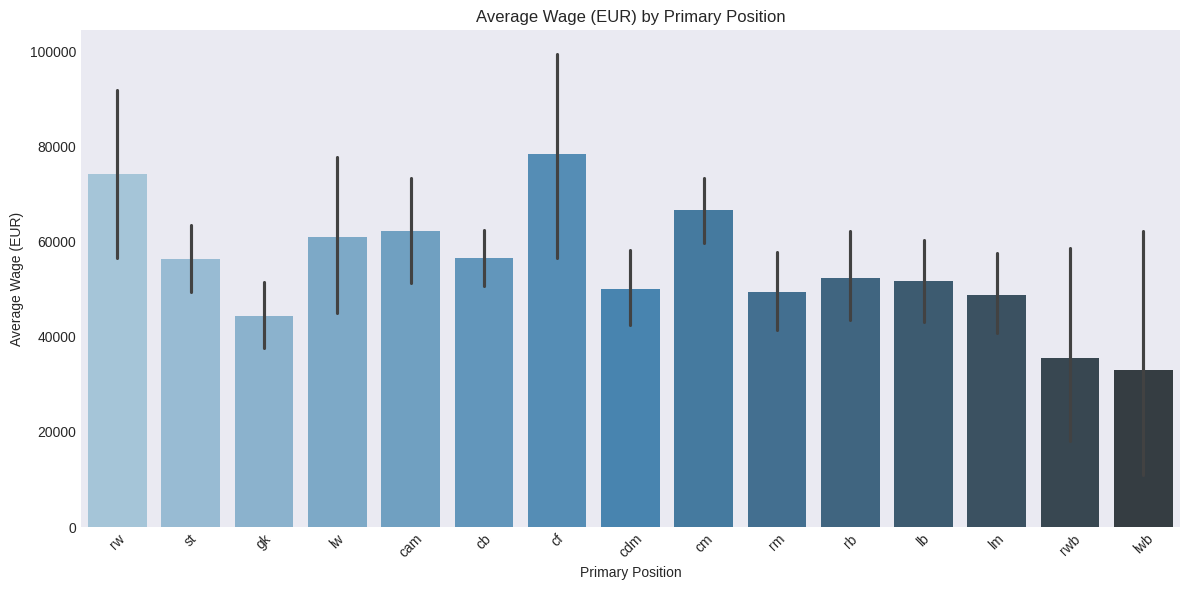

In [121]:
# Grouped comparison example: Average wage by player position. 
# For our analysis, we extract the first three characters as a proxy.
if 'player_positions' in df.columns and 'wage_eur' in df.columns:
    df['primary_position'] = df['player_positions'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='primary_position', y='wage_eur', data=df, palette="Blues_d", estimator=np.mean)
    plt.title("Average Wage (EUR) by Primary Position")
    plt.xlabel("Primary Position")
    plt.ylabel("Average Wage (EUR)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Inferences
## Univariate Analysis Inferences
1. Histograms and Box Plots (Numerical Variables):
- Most key numerical features—such as age, height_cm, weight_kg, overall rating, potential rating, market value (value_eur), wage (wage_eur), and various skill metrics (e.g., pace, shooting, passing, dribbling, defending, and physic)—show distributions that are not perfectly normal.
- For example, the age histogram reveals a clustering of players in their mid-20s to early 30s; while the box plots highlight that some features (such as wage_eur or market value) have long tails or potentially extreme values.
- The medians and means (plus measures of skewness) indicate that a few high-value outliers drive up the average for some monetary features, even after cleaning and (in some cases) capping extreme values.

1. Frequency Distributions (Categorical Variables):
- Count plots for categorical fields (like club_name, league_name, and player_positions) illustrate that a relatively small set of clubs or leagues account for the majority of the player records in the dataset.
- Pie charts and bar charts for variables like nationality and preferred_foot show consistent usage (for example, “right” typically dominates the preferred foot category).
- These graphs confirm the existence of grouping and possible concentration in the dataset—important to note when comparing performance across groups.

## Bivariate Analysis Inferences
1. Correlation Matrix (Heatmap):
- The correlation heatmap of numerical features reveals a number of strong linear associations. For instance, there is a strong positive correlation between overall rating and potential rating, and between market value (value_eur) and wage (wage_eur).
- Many skill-related metrics (such as passing, dribbling, and shooting) correlate moderately with overall performance. This insight might guide feature selection in later predictive modeling or clustering tasks.
- Some negative or near-zero correlations indicate independent aspects; for example, while overall and potential are tightly linked, some physical attributes may not be as strongly associated.

2. Scatter Plots (Numerical vs. Numerical):
- Plots such as overall rating vs. potential clearly show a near-linear relationship indicating that as a player’s current rating increases, their potential rating tends to be higher.
- Other scatter plots (e.g., wage_eur versus overall rating) demonstrate that higher-performing players generally command higher wages. However, the spread in wages can still be considerable due to market dynamics or club financial differences.
- Such relationships reinforce the idea that many of the players’ attributes are interconnected.

3. Box/Violin Plots (Numerical vs. Categorical):
- For categorical comparisons—like comparing overall rating distributions by league or by club—box plots reveal that the top leagues (for instance, the English Premier League or Spanish Primera Division) tend to have a higher median overall rating.
- These comparisons help identify variance within groups; for example, while one league may have a higher average rating, there might also be a wider spread (or more outliers) within that group.

## Multivariate Analysis Inferences
1. Pair Plots:
- Pair plots of the selected numerical variables (possibly using a sampled subset to reduce clutter) help visualize pairwise relationships simultaneously.
- These plots often reveal clusters or groupings among players—indicating that players with similar overall and skill profiles tend to cluster together.
- They also confirm many of the bivariate conclusions about linearity and correlation that the heatmap and scatter plots suggest.

2. Grouped Comparisons (e.g., Average Wage by Primary Position):
- When the analysis groups players by derived features (such as extracting a “primary_position” from the player_positions column), the resulting bar plots clarify that certain positions tend to command higher wages on average. For example, attacking roles (such as ST or CF) may have higher market values and wage averages compared to some defensive positions.
- This differentiation emphasizes how role and position contribute to a player’s economic value.
  
## Overall Conclusions
The cleaning phase successfully handled missing values (by imputing medians for continuous variables and modes for categorical ones), removed duplicate records, and managed extreme values through capping—ensuring that subsequent analyses would be robust.

The univariate analyses illustrate that while most players lie around a central tendency (for age, overall rating, etc.), there is still considerable variability in monetary and skill-related features.

The bivariate analyses highlight clear relationships between performance metrics (overall, potential) and market-related factors (value_eur, wage_eur). The correlations suggest that as player performance increases, so too do financial metrics, an insight that can be exploited in player valuation models.

Multivariate comparisons and pair plots underscore that there are coherent groupings in the data—players in similar positions or belonging to the same league/club tend to share similar profiles, an observation useful for segmentation and clustering studies.

In summary, the EDA has provided valuable insights into the structure, quality, and key relationships in the players_21.csv dataset. These conclusions support further analysis, whether for building predictive models, performing clustering, or gaining a deeper understanding of player attributes and their market impact.

## 3. Conclusion
In this assignment we have: 
• Successfully loaded and inspected the players_21.csv dataset.  
• Addressed missing values by imputing with the median for numerical features and the mode for categorical features.  
• Removed duplicate records and capped outliers in key numerical columns using the IQR method.  
• Standardized categorical values to ensure consistency.
In the EDA section, we explored the distributions and relationships using summary statistics, histograms, box plots, correlation heatmaps, scatter plots, and pair plots. Grouped comparisons (such as average wage by player position) further enriched our understanding of the dataset.
